# Light curves distribution analysis

Obligatory import for the notebook sake.

In [1]:
import os
import lsst.afw.geom as afwGeom
import lsst.afw.table as afwTable
import pickle

import numpy as np

import lsst.daf.persistence as dafPersist
import re
import astropy.coordinates as coord
import astropy.units as u

import matplotlib.pyplot as plt
from astropy.table import Table

/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2016-04-04/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


File containing the Mjd dictionary. Directory definition (depending wich set of data is going to be used)

In [2]:
pkl_file = open('mjd_dict.pickle', 'rb')
mjds = pickle.load(pkl_file)


Some useful methods

In [89]:
def source_distance(src1, src2):
    ra, dec = src1['ra'], src1['dec']
    ra2, dec2 = src2['ra'], src2['dec']
            
    return np.sqrt((float(ra)-float(ra2))**2+(float(dec)-float(dec2))**2)/3.14159*180*3600


def threshold_light_curves(light_curves, threshold):
    t_light_curves = [lc for lc in light_curves if len(lc) >= threshold]
    return t_light_curves

def build_light_curve_from_snls_file(data):


    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    #lightcurve['ra'] = []
    #lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for mjd, flux, error in data:

        #print 'yep',visit
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        lightcurve['mjd'].append(float(mjd))
        #lightcurve['ra'].append(c.ra.radian)
        #lightcurve['dec'].append(c.dec.radian)
        lightcurve['flux'].append(float(flux))
        lightcurve['flux_error'].append(float(error))
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')

    lc = Table(data=lightcurve)
    return lc

def build_light_curve_from_snls_file(data, c):

    bandpasses = ['r']


    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for mjd, flux, error in data:

        #print 'yep',visit
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        lightcurve['mjd'].append(float(mjd))
        lightcurve['ra'].append(c.ra.radian)
        lightcurve['dec'].append(c.dec.radian)
        lightcurve['flux'].append(float(flux))
        lightcurve['flux_error'].append(float(error))
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')

    lc = Table(data=lightcurve)
    return lc

def build_lightcurve(source_list):
    """
    Assemble a light curve data table from available files.
    """

    bandpasses = ['r']


    lightcurve = {}
    lightcurve['classification'] = []
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for visit, src in source_list:

        #print 'yep',visit
        lightcurve['classification'].append(src['classification_dipole'])
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        
        lightcurve['mjd'].append(mjds[str(visit)])
        lightcurve['ra'].append(src['coord_ra'])
        lightcurve['dec'].append(src['coord_dec'])
        lightcurve['flux'].append(src['base_CircularApertureFlux_4_5_flux'])
        lightcurve['flux_error'].append(src['base_CircularApertureFlux_4_5_fluxSigma'])
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')
    lightcurve = Table(data=lightcurve)
    return lightcurve


def mean_lc_flux(lc2):

    mjds = []
    m_fluxes = []
    m_error = []
    s_error = []
    i = 0
    while i < len(lc2['mjd']):
        mjd = lc2['mjd'][i]
        j = i+1
        mjds.append(int(mjd))
        m_fluxes.append(lc2['flux'][i]*lc2['flux_error'][i])
        m_error.append(lc2['flux_error'][i])
        s_error.append(lc2['flux_error'][i]**2)
        total = 1.
       
        while j<len(lc2['mjd']) and int(lc2['mjd'][j]) == int(mjd):

            m_fluxes[-1]+= lc2['flux'][j]*lc2['flux_error'][j]
            

                
            m_error[-1] += lc2['flux_error'][j]
            s_error[-1] += (lc2['flux_error'][j]**2)
            #mjds[-1] += int(lc2['mjd'][j])
            total+=1
            j+=1
            
       
        m_fluxes[-1] = np.divide(m_fluxes[-1], m_error[-1] )
        m_error[-1] = np.divide(np.sqrt(s_error[-1]), total)
        i = j

    return mjds, m_fluxes, m_error


In [4]:
def plot_object_distribution(data):
    plt.figure(figsize=(20,10))
    ind = range(0, len(data.values()))
    p = plt.bar(ind, data.values(),  align='center')
    plt.xticks(ind, data.keys())
    
    total = sum(data.values())

    for i, rect in enumerate(p):
        h = rect.get_height()
        perc = np.around(float(h)/total*100, 2)
        plt.text(rect.get_x()+ rect.get_width()/3, rect.get_height()+15, str(perc) +"% = "+  str(int(h)), fontsize=15)

    plt.show()
    
def plot_light_curve_with_tags(light_curve):
    
    plt.figure(figsize=(20,10))
    class_lc = light_curve.group_by("classification")
    indices = class_lc.groups.indices

    for i in range(1, len(indices)):
        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        marker = marker_dict[group[-1]["classification"]]
        label =  classification_dict[group[-1]["classification"]]
        plt.errorbar(group["mjd"], group["flux"],  yerr=group["flux_error"], fmt=marker, color='red', label=label, markersize=10)

    plt.legend(numpoints=1)
    #plt.ylim(ymin=0)

    plt.show()

def plot_proportion(x_data, y_data, x_data_label="x", y_data_label="y", percentual=False):
    
    plt.figure(figsize=(20,10))
    plt.scatter(x_data, y_data, 10)
    plt.xlabel(x_data_label)
    plt.ylabel(y_data_label)
    plt.xlim(xmin=-1)
    plt.ylim(ymin=-1)
    if percentual == False:
        max_n = max(max(x_data), max(y_data))+10
    else:
        max_n = 110
        plt.xticks(np.arange(0,101,10))
        plt.yticks(np.arange(0,101,10))
        plt.xlim(xmax=100)
        plt.ylim(ymax=100)
        
    plt.plot([0,max_n], [0,max_n], 'r--')
    
    for i in np.arange(0,max_n, 10):
        plt.plot([0,i], [i,0],  'r--')
    plt.grid(True)
    plt.show()
    


Light curves from SNLS are read.

14 17 10.042 +53 01 29.370
06D3bz


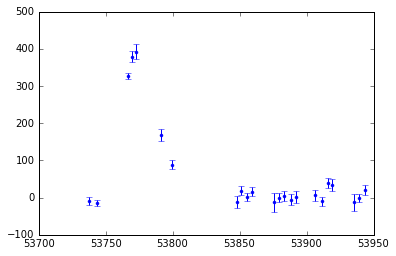

14 20 43.574 +52 11 27.830
06D3cb


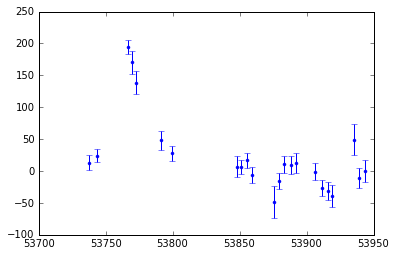

14 17 31.600 +52 54 44.900
06D3cc


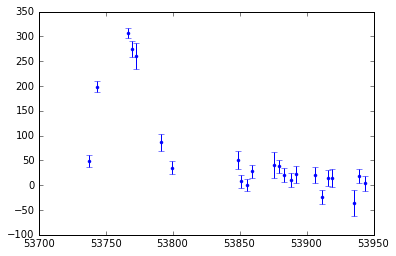

14 19 25.848 +52 38 27.540
06D3cn


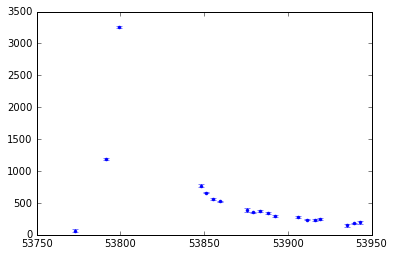

14 22 17.209 +52 57 27.650
06D3df


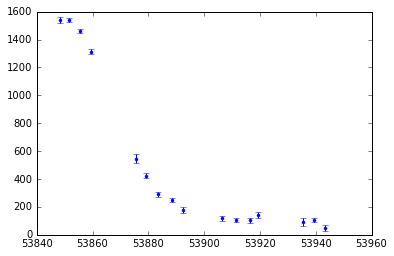

14 22 12.577 +52 38 27.050
06D3dl


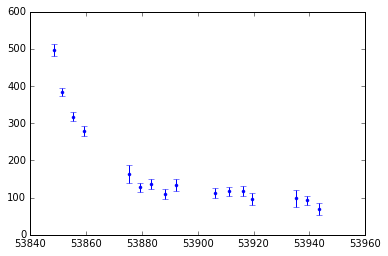

14 16 59.392 +52 52 57.160
06D3do


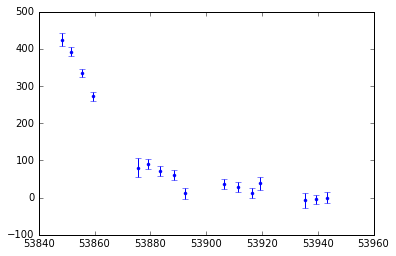

14 17 21.664 +52 27 10.140
06D3dt


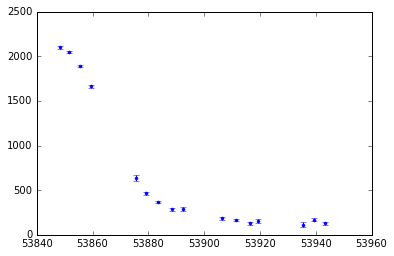

14 18 47.802 +52 45 23.610
06D3ed


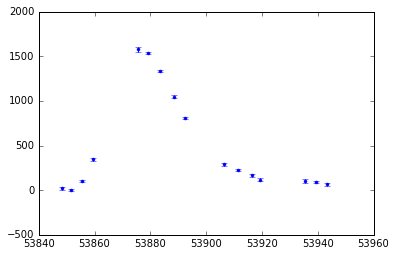

14 17 01.087 +52 13 56.640
06D3el


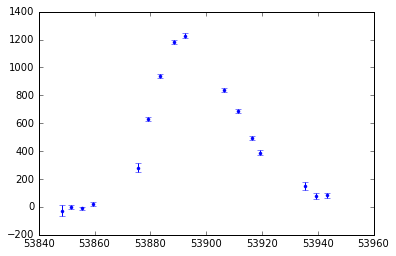

14 19 23.419 +53 01 22.850
06D3em


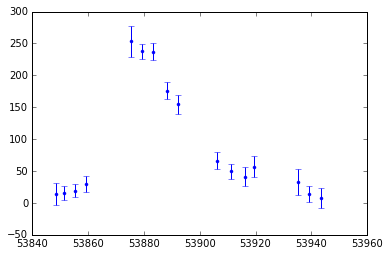

14 21 13.336 +52 27 21.880
06D3en


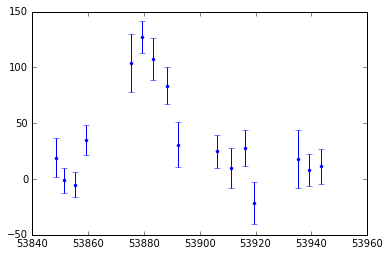

14 22 04.770 +52 20 18.120
06D3et


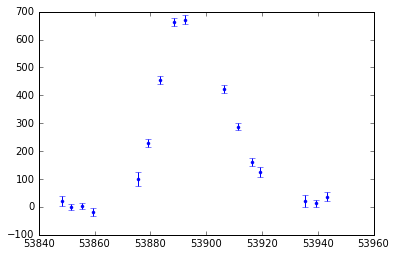

14 20 18.605 +52 53 49.790
06D3fp


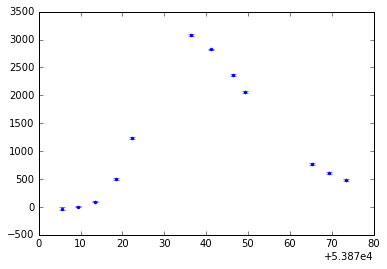

14 18 31.419 +52 26 34.470
06D3gh


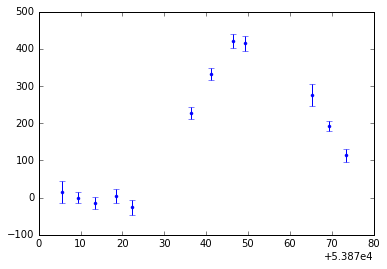

14 17 44.630 +52 21 40.250
06D3gn


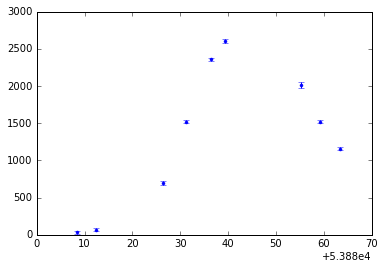

14 17 03.234 +52 56 10.510
06D3gx


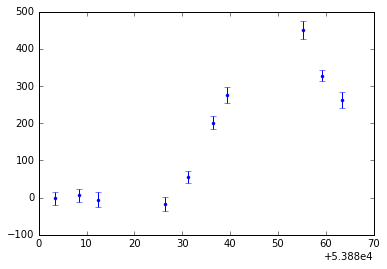

In [88]:


f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
#m = re.findall('^06D3.*?\\|(.*?)\\|', data, re.MULTILINE)
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()


%matplotlib inline
snls_array = []
for sn in elems:
    print sn[-1]
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    print sn[0]
    snls_lc = build_light_curve_from_snls_file(m, c)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    snls_array.append(snls_lc)
    plt.show()
    
#pickle.dump(snls_array, open('/renoir_data_02/jpreyes/lsst_data/transients_files/snls_transients_filter_r.lc', 'wb'))


This method allows to create a unified catalog per visit. The twin notebook of this one performs a thresholding by removing all detections not tagged as "positive". This notebook keeps every detection with its classification.

In [8]:
import numpy as np

import lsst.daf.persistence as dafPersist
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"

butler = dafPersist.Butler(DATADIR+"/output")
visits = butler.queryMetadata("deepDiff_differenceExp", format=['visit'],dataId={'filter':'r'})
visits = np.array(visits)
mask = (visits >= 836493) & (visits <= 860150)
visits =  visits[mask]
print visits, len(visits)

[836493 836494 836495 836496 836497 836498 837002 837003 837004 837005
 837006 837007 837008 838853 838854 838855 838857 838864 838865 838866
 838867 838868 839308 839309 839310 839311 839312 844210 844211 844212
 844213 844214 844230 844489 844490 844491 844492 844493 844494 844495
 844496 844497 844498 844514 844515 844516 844517 844518 844845 844846
 844847 844848 844849 845345 845346 845347 845348 845349 849373 849374
 849375 849376 849377 849685 849686 849687 849688 849689 850177 850178
 850179 850180 850181 850586 850587 850588 850589 850590 851057 851058
 851059 851060 851061 852890 852891 852892 852893 852894 853232 853233
 853234 853235 853236 853539 853540 853541 853542 853543 853727 853728
 853729 853730 853731 858537 858538 858539 858540 858541 859608 859609
 859610 859611 859612 860146 860147 860148 860149 860150] 118


In [7]:
in_directory = "catalogs/6sigma/"
v_dict = {}
c_files = glob.glob(in_directory+"*.fits")
for c_f in c_files:
    name =  c_f.split("/")[-1].split("-")[0]
    v_dict[name] = 0

NameError: name 'glob' is not defined

In [9]:
for v in visits:
    if v_dict.has_key(str(v)):
        v_dict[str(v)]=1

In [10]:
in_directory = "catalogs/3sigma/"
out_directory = "nc_catalogs/3sigma/"
import lsst.afw.table as afwTable
import glob

f_s = []

for c_cat in visits:
    v_catalog = None
    #print "catalogs/6sigma/"+str(c_cat)+"*.fits"
    c_files = glob.glob(in_directory+str(c_cat)+"*.fits")
    f_ss = []
    for c_file in c_files:
        f_ss.append(c_file)
        catalog = afwTable.SourceCatalog.readFits(c_file)
       
        if v_catalog is None:
            v_catalog = catalog.copy()
        else:
            v_catalog.extend(catalog)
            
    if v_catalog is not None:        
        v_catalog.writeFits(out_directory+"/"+c_files[0].split("/")[-1].split("-")[0]+".fits")
        f_s.append(f_ss)

Multimatch function is used to create the light curves

In [11]:
#in_directory = "catalogs/6sigma/"
#out_directory = "nc_catalogs/6sigma/"
in_directory = "nc_catalogs/3sigma/"

import lsst.afw.table as afwTable
import glob

multi_matches = None

for c_cat in visits:
    v_catalog = None
    #print "catalogs/6sigma/"+str(c_cat)+"*.fits"
    c_files = glob.glob(in_directory+str(c_cat)+"*.fits")
    
    for c_file in c_files:
        catalog = afwTable.SourceCatalog.readFits(c_file)
        
        if multi_matches is None and len(catalog)>0:
            multi_matches = afwTable.MultiMatch(catalog[0].schema, {'visit':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
        if multi_matches is not None:
            multi_matches.add(catalog, {'visit':int(c_files[0].split("/")[-1].split("-")[0].split(".")[0])})
            
    
results = multi_matches.finish(removeAmbiguous=False)  

In [12]:
print len(visits)

118


In [17]:
print len(results)

TypeError: object of type 'int' has no len()

In [13]:
for r in results:
    if r['object'] == 8:
        print r['visit'], r["base_CircularApertureFlux_4_5_flux"]
    if r['object'] == 9:
        break

836493 -1916.53637695


Light curves are thresholded using the total number of points belonging to the curve.

In [14]:
light_curves = []
i = 0
current = -1
while i < len(results):
    result = results[i]
    if current == -1 or current != result['object']:
        lc = [(result['visit'],result)]
        light_curves.append(lc)
        current = result['object']
    else:
        light_curves[-1].append((result['visit'],result))
    i+=1

t_light_curves = threshold_light_curves(light_curves, 10)
print len(t_light_curves)

15246


In [442]:
count = 0
for t_l in t_light_curves:
    storage = []
    for v, s in t_l:
        storage.append((v, s["base_CircularApertureFlux_4_5_fluxSigma"]))
    if len(t_l) != len(set(storage)):
        count += 1

In [443]:
print count

0


In [392]:
l_c = t_light_curves[7]
for v, p in l_c:
    print v, p["base_CircularApertureFlux_4_5_flux"]

837002 4028.9597168
837004 44978.9804688
838865 -4526.77001953
838868 3407.2878418
844211 -7398.30664062
844517 17431.1933594
851060 -98525.5
851061 -338550.9375
852893 33339.9765625
853543 44407.640625
860147 9942.95507812
860148 4827.58544922
860150 3288.01782227


SNcosmo Light curve objects are created in this step.

In [15]:
#lc = build_lightcurve(t_light_curves[4])
lcs = []
for t_light_curve in t_light_curves:
    lcs.append(build_lightcurve(t_light_curve))

In [19]:
count = 0
for t_l in lcs:
    storage = []
    for point in t_l:
        storage.append((point["mjd"], point["flux"]))
    if len(t_l) != len(set(storage)):
        count += 1

In [20]:
count

0

This method informs the match percentage with SNLS data.

In [16]:

matches = []
for sn in elems:
    
    match = False
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    
    for i, lc in enumerate(lcs):
        #print lc[0]['ra']
        #print lc[0]['dec']
        if source_distance(lc[0], {'ra':c.ra.radian, 'dec':c.dec.radian}) < 2:
            match = True
 
            matches.append((sn[0], i))
            break
    
        #print 'no match'
print 'found ' + str(float(len(matches))/float(len(elems))) 

found 0.176470588235


Some dictionaries are created in order to visualize the light curves composition

In [21]:
props = {}

for lc in lcs:
    for point in lc:
        if props.has_key(point['classification']) == False:
            props[point['classification']] = 1
        else:
            props[point['classification']]+=1
            

            
classification_dict = {0:"Dipole type I", 1: "Dipole type II", 3:"Fringe", 4: "Artifact", 5:"Negative", 6:"Positive", 7:"Point Positive"}
marker_dict = {0:"x", 1: "x", 3:"^", 4: ".", 5:"v", 6:"*", 7:"."}

for key in classification_dict.keys():
    if props.has_key(key) == True:
        props[classification_dict[key]] = props.pop(key)

Composition percentage per category

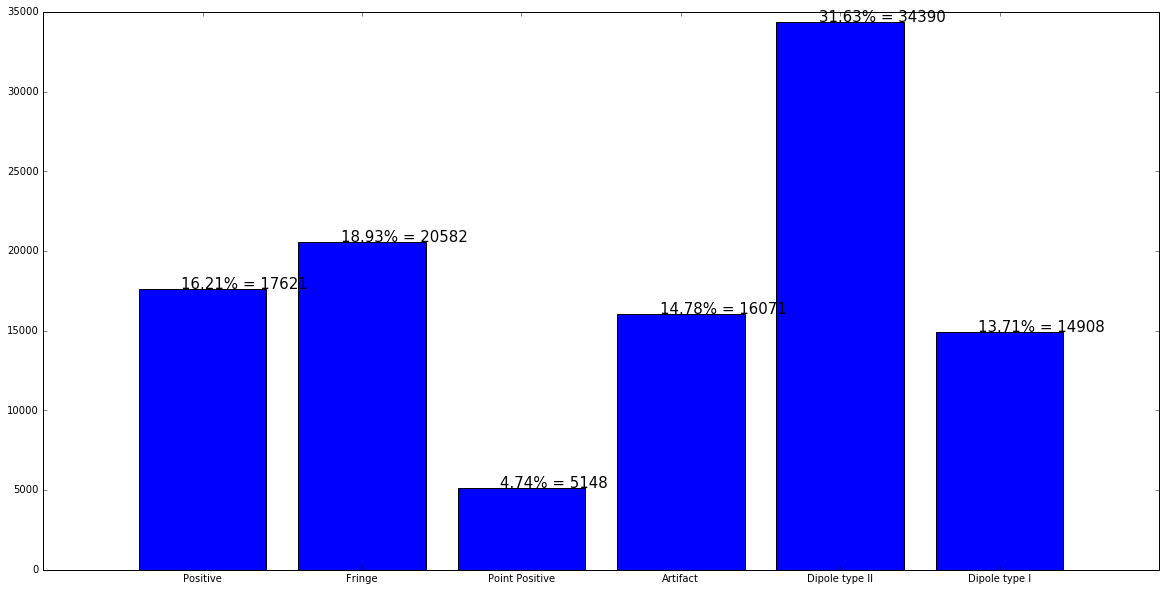

In [24]:
plot_object_distribution(props)

code for light curve visualization, while showing the different tags for each detection.

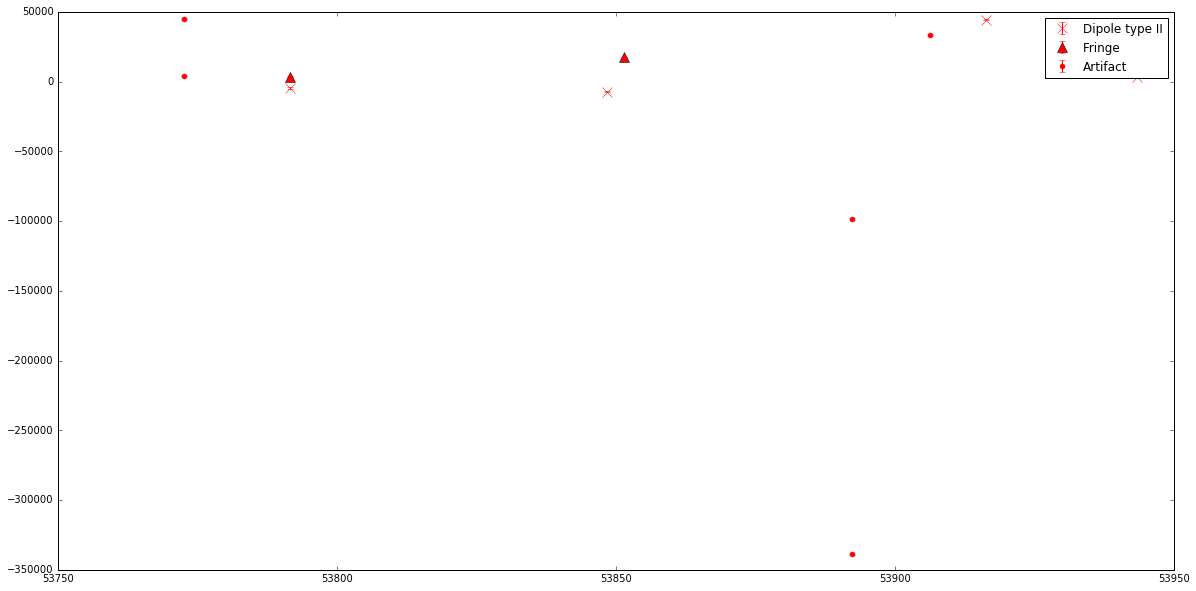

In [314]:
lc = lcs[7]
plot_light_curve_with_tags(lc)

In [315]:
classification_dict = {0:"Dipole type I", 1: "Dipole type II", 3:"Fringe", 4: "Artifact", 5:"Negative", 6:"Positive", 7:"Point Positive"}
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

In [316]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()
for lc in lcs:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=len(group)
        



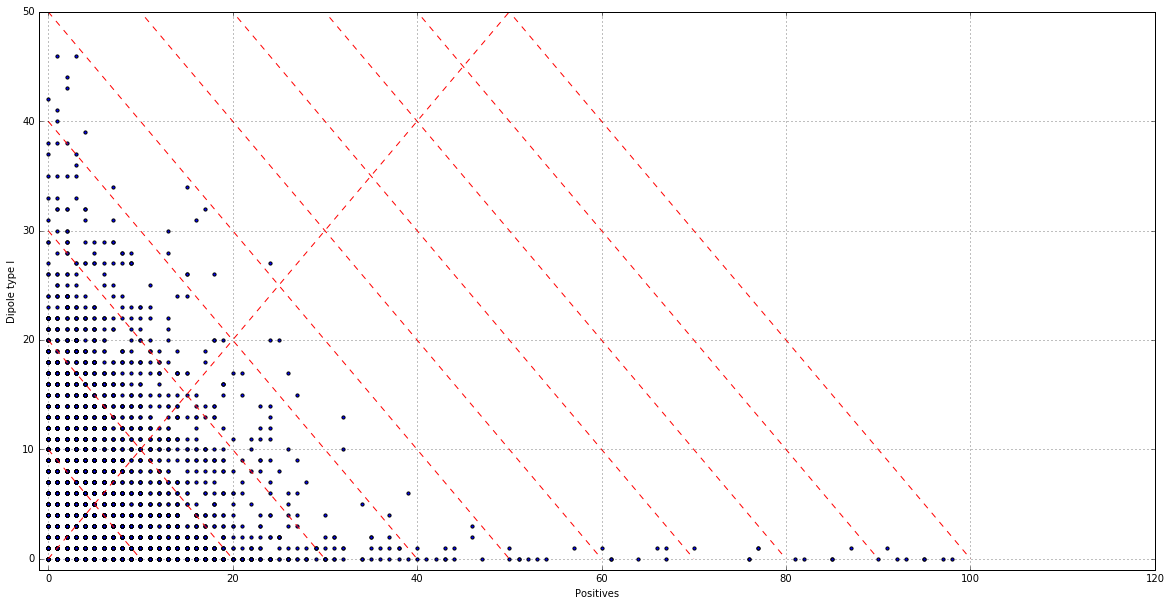

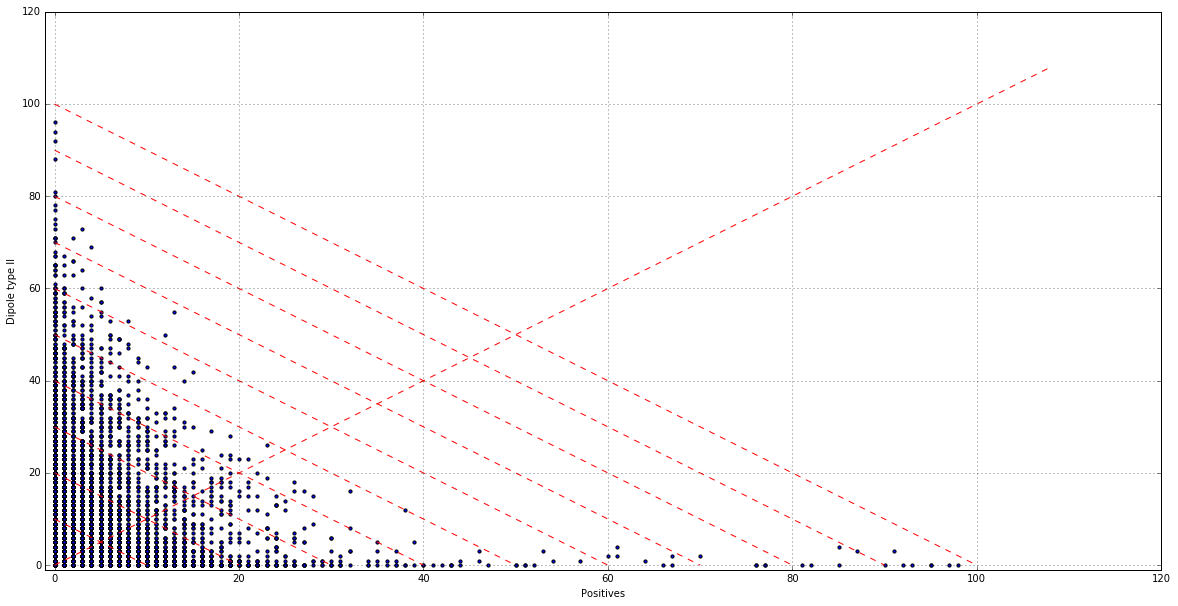

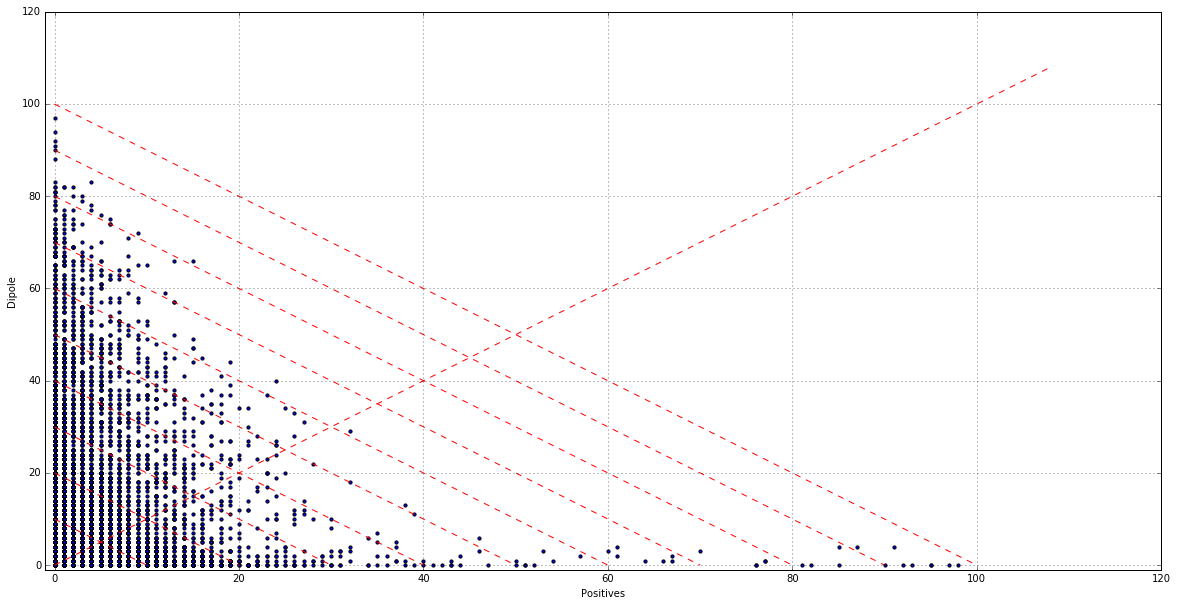

In [317]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I")
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II")
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole")

In [318]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()

for lc in lcs:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=float(len(group))/len(lc)*100
        

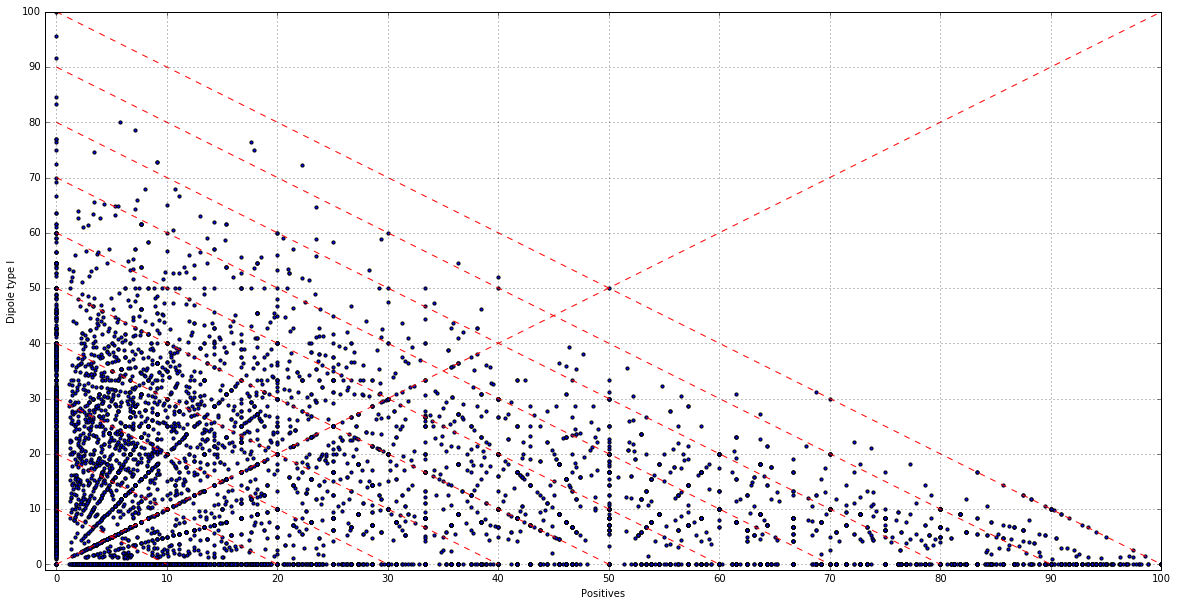

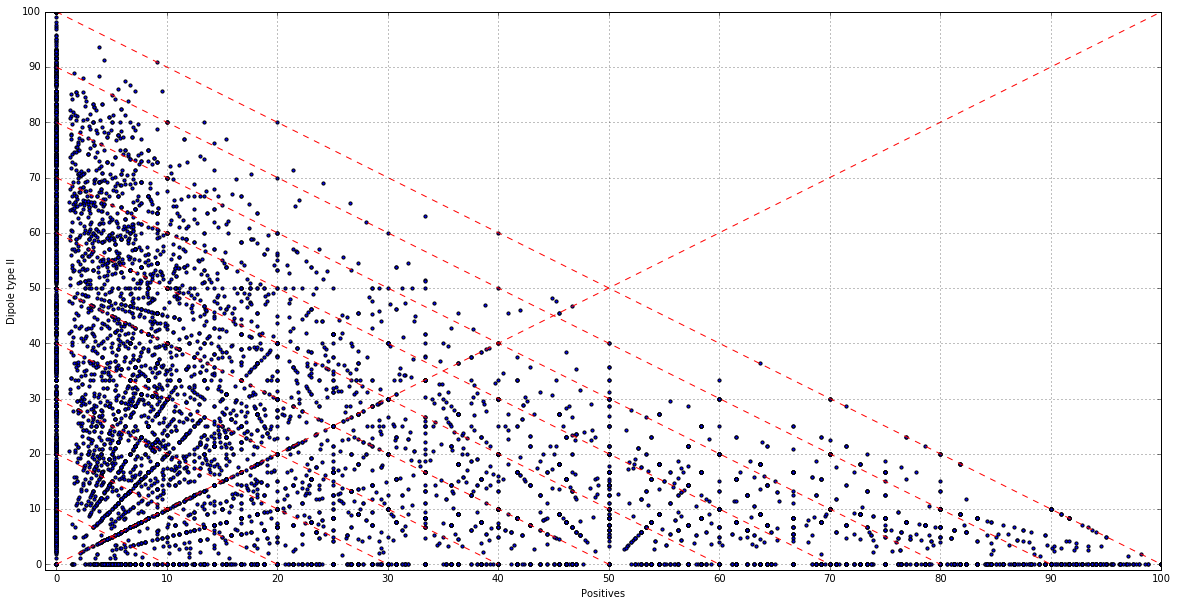

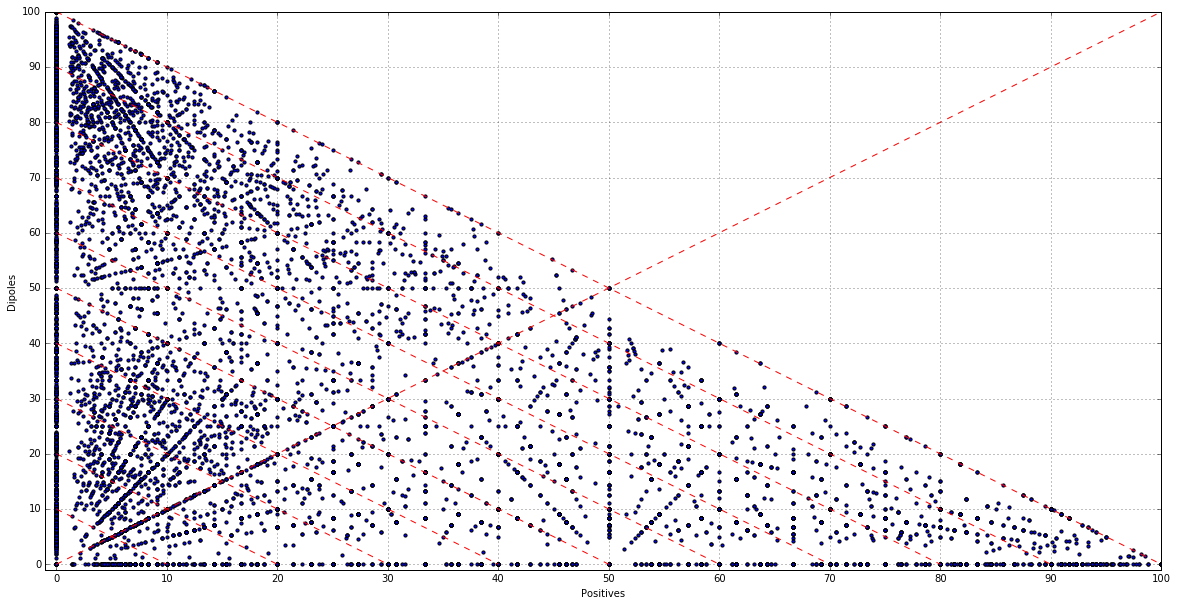

In [319]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I", percentual = True)
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II", percentual = True)
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipoles" , percentual = True)

# Light curves with 50% or more positive detections

In [320]:
mostly_pos = []
for lc in lcs:
    total = len(lc)
    req = lc['classification']==6
    pos = lc[req]
    if len(pos)/float(total) > 0.5:
        mostly_pos.append(lc)

In [321]:
props = {}

for lc in mostly_pos:
    for point in lc:
        if props.has_key(point['classification']) == False:
            props[point['classification']] = 1
        else:
            props[point['classification']]+=1
            
for key in classification_dict.keys():
    if props.has_key(key) == True:
        props[classification_dict[key]] = props.pop(key)

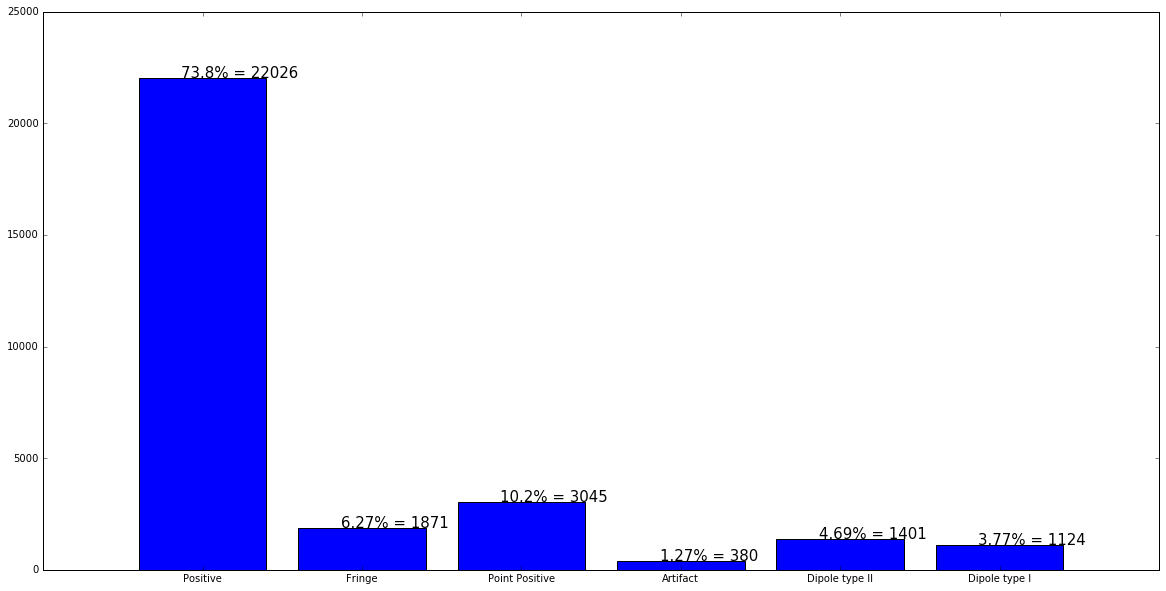

In [322]:
plot_object_distribution(props)

In [323]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()
for lc in mostly_pos:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=len(group)



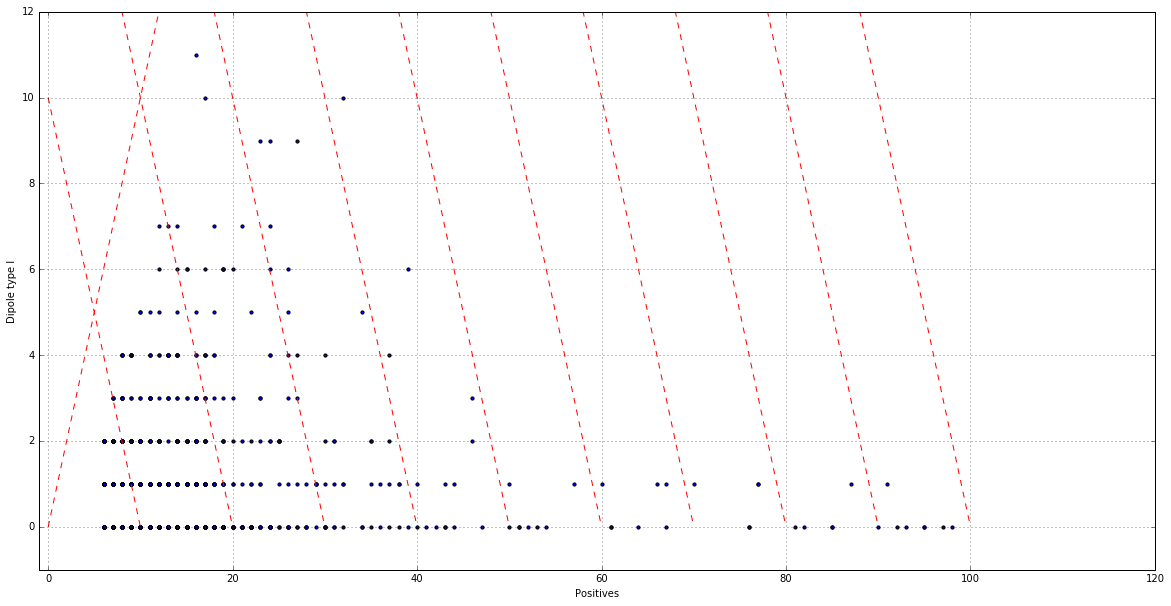

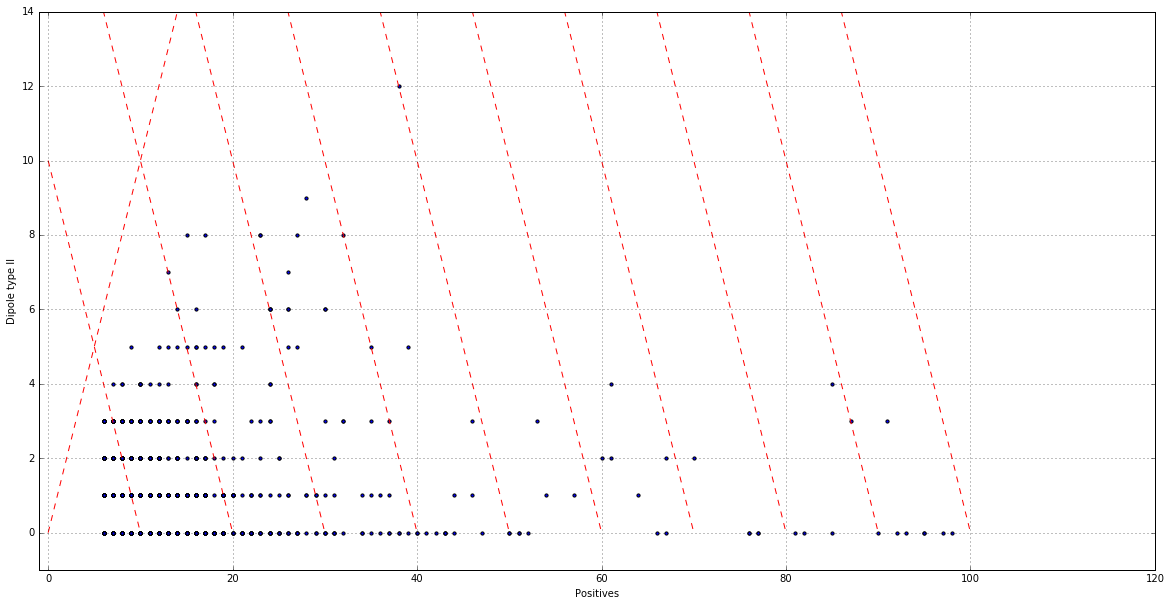

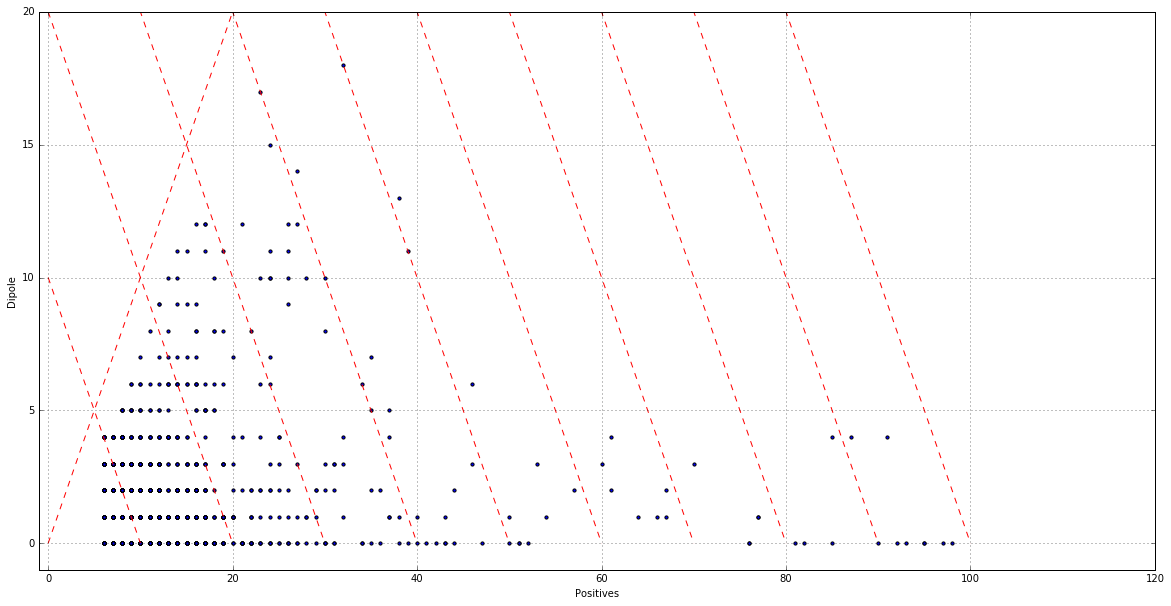

In [324]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I")
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II")
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole")

In [325]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()

for lc in mostly_pos:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=float(len(group))/len(lc)*100
        

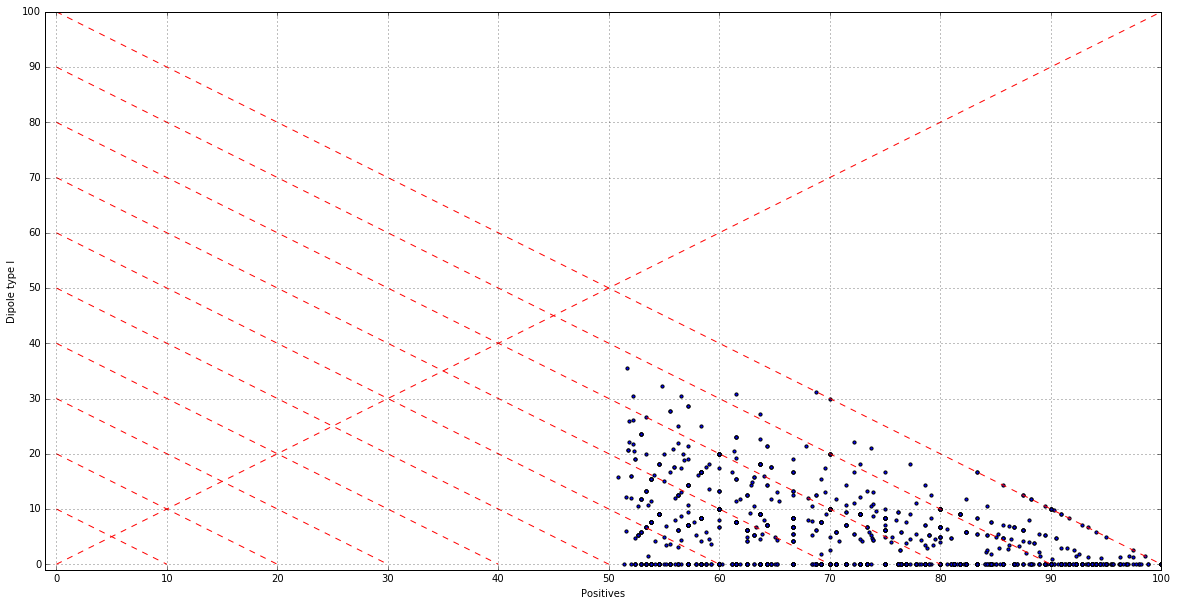

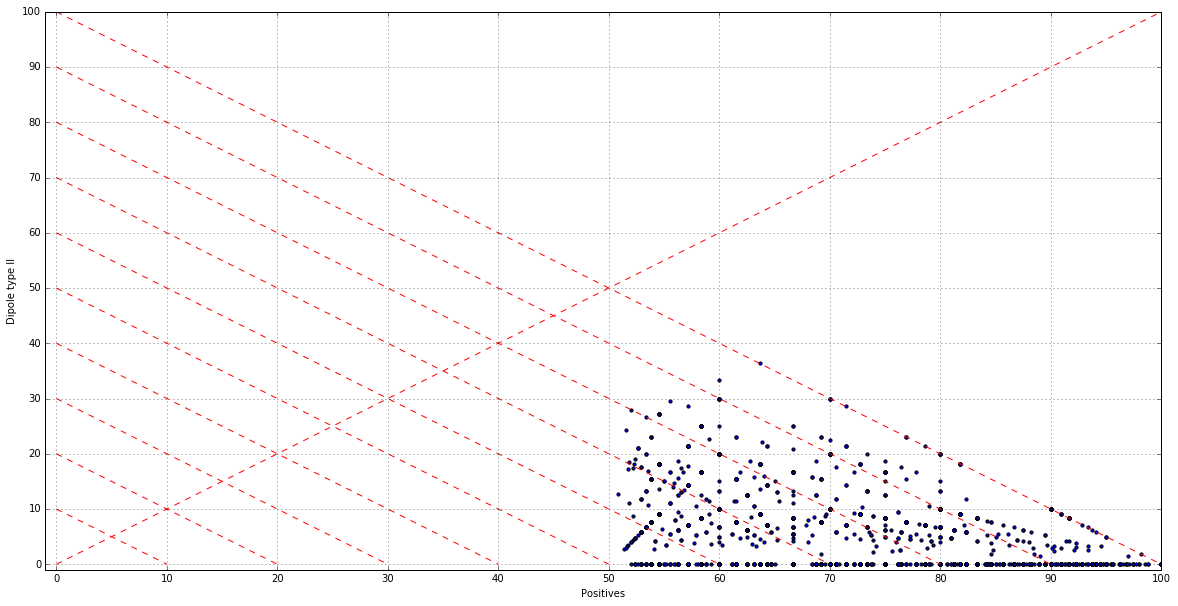

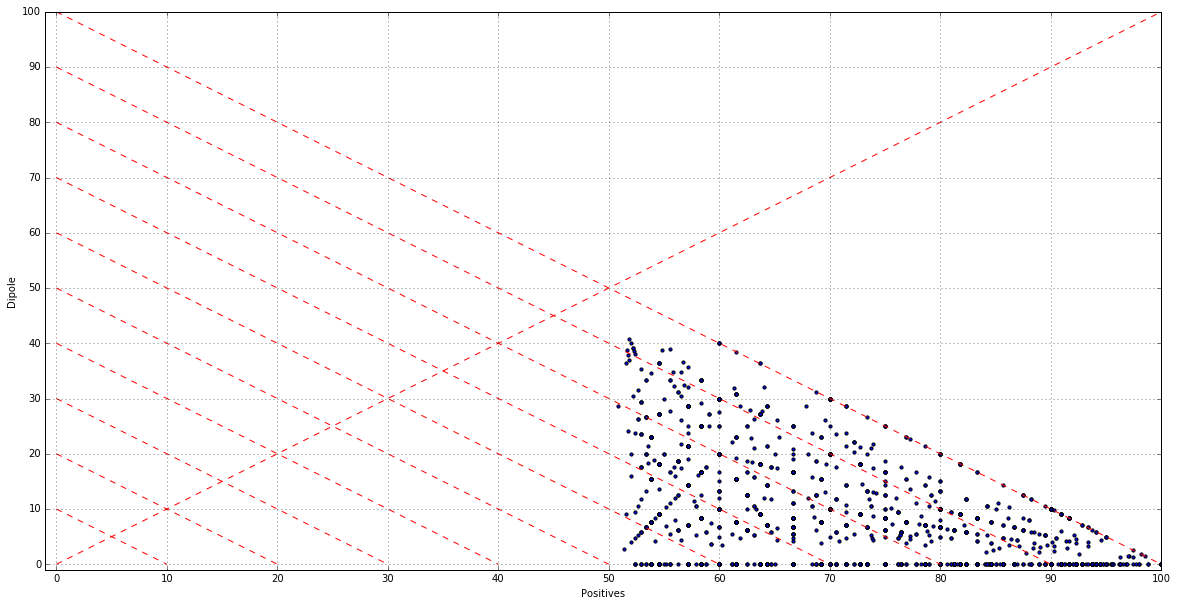

In [326]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I", percentual=True)
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II", percentual=True)
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole", percentual=True)

# Transient candidates within 15 days

In [375]:
short_transients = []
for lc in lcs:
    mjds = lc["mjd"]
    if np.std(mjds) < 15:
        short_transients.append(lc)
        


In [376]:
print len(short_transients)

95


In [377]:
props = {}

for lc in short_transients:
    for point in lc:
        if props.has_key(point['classification']) == False:
            props[point['classification']] = 1
        else:
            props[point['classification']]+=1
            
for key in classification_dict.keys():
    if props.has_key(key) == True:
        props[classification_dict[key]] = props.pop(key)

total = 0
for key in props.keys():
    total += props[key]



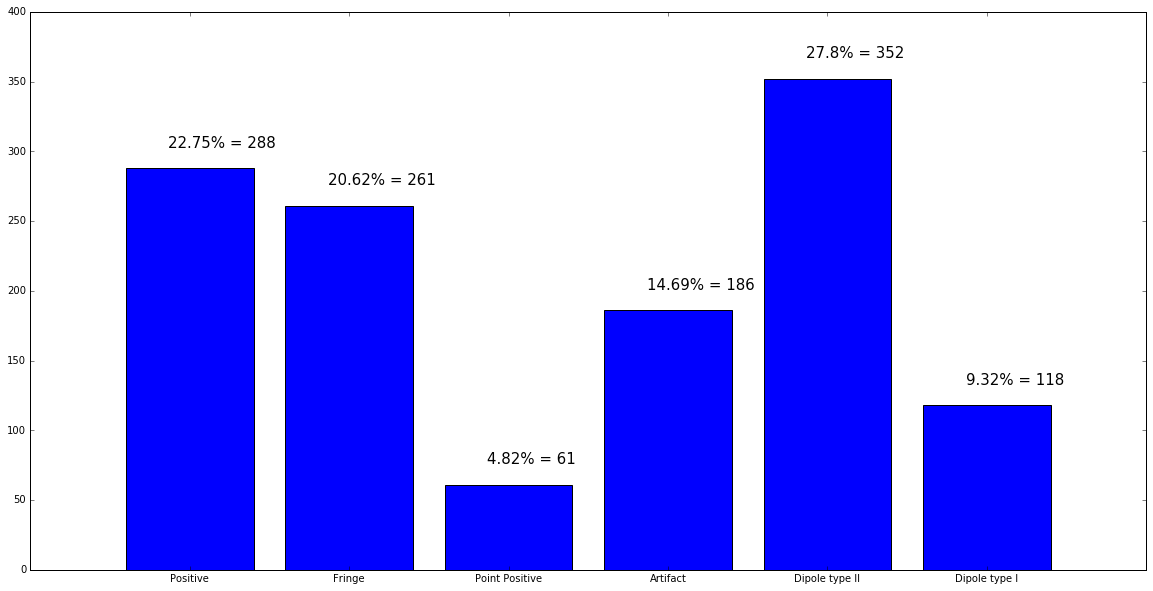

In [378]:
plot_object_distribution(props)

In [331]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()
for lc in short_transients:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=len(group)

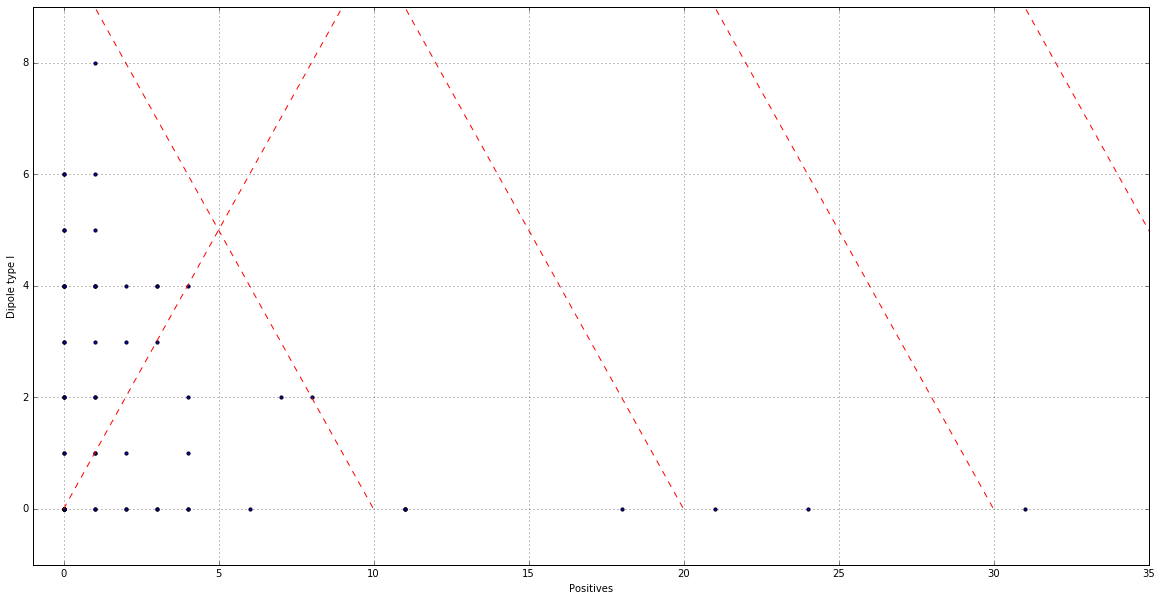

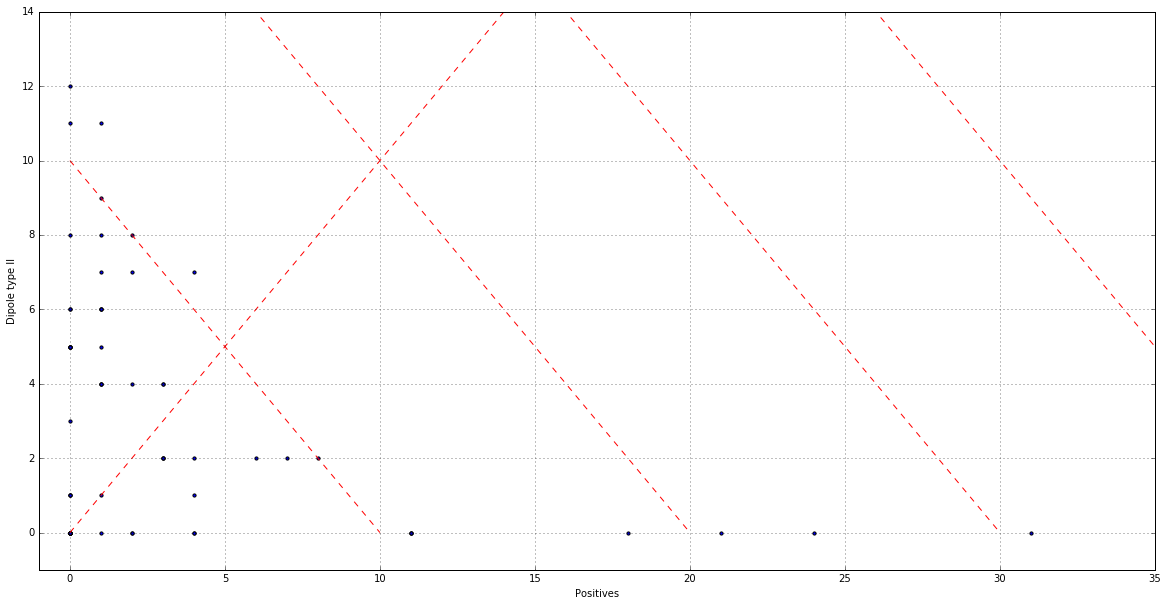

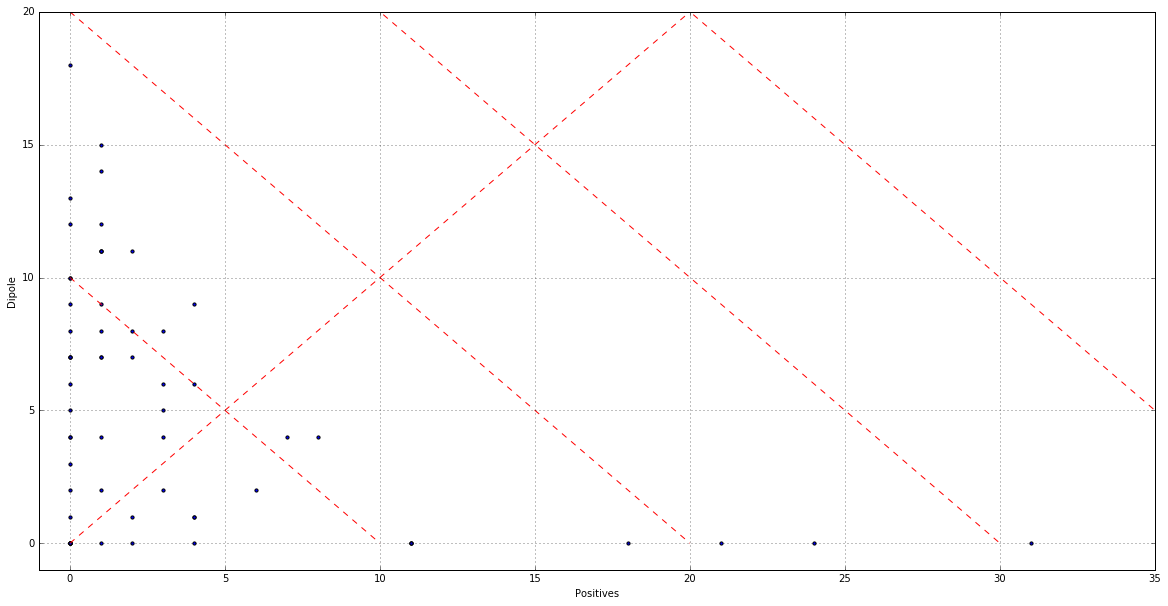

In [332]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I")
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II")
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole")

In [333]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()
for lc in short_transients:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=float(len(group))/len(lc)*100

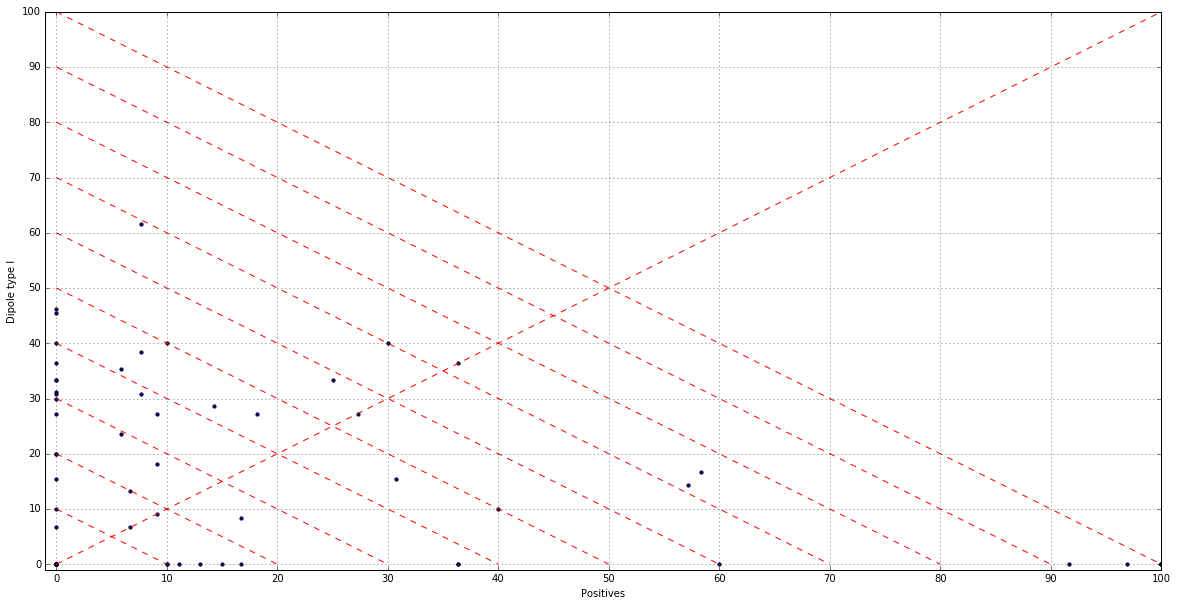

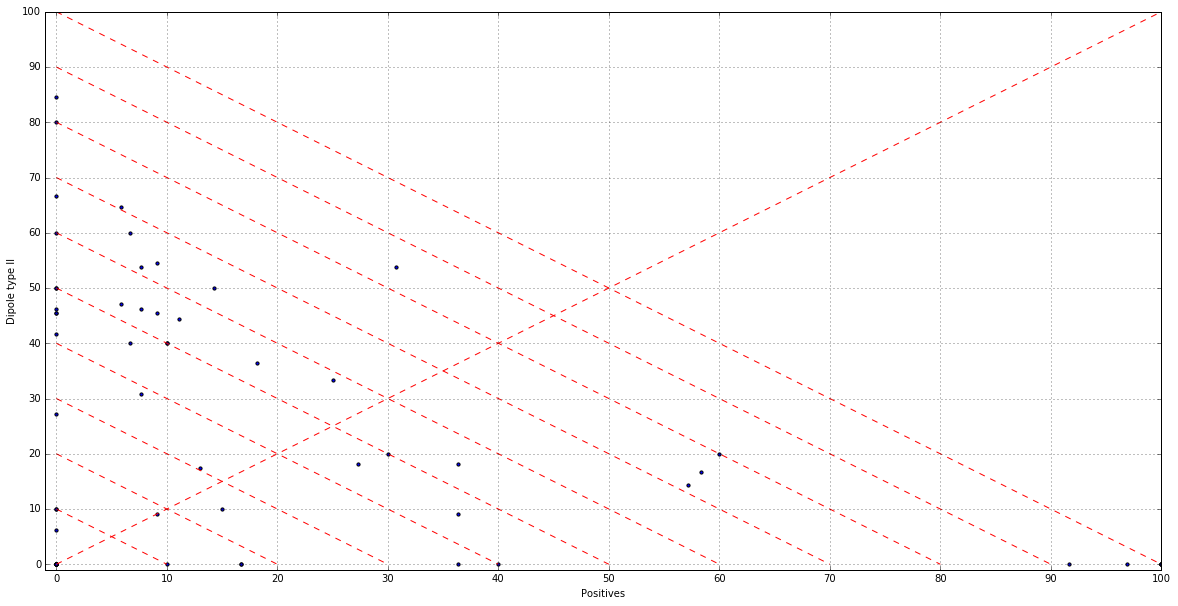

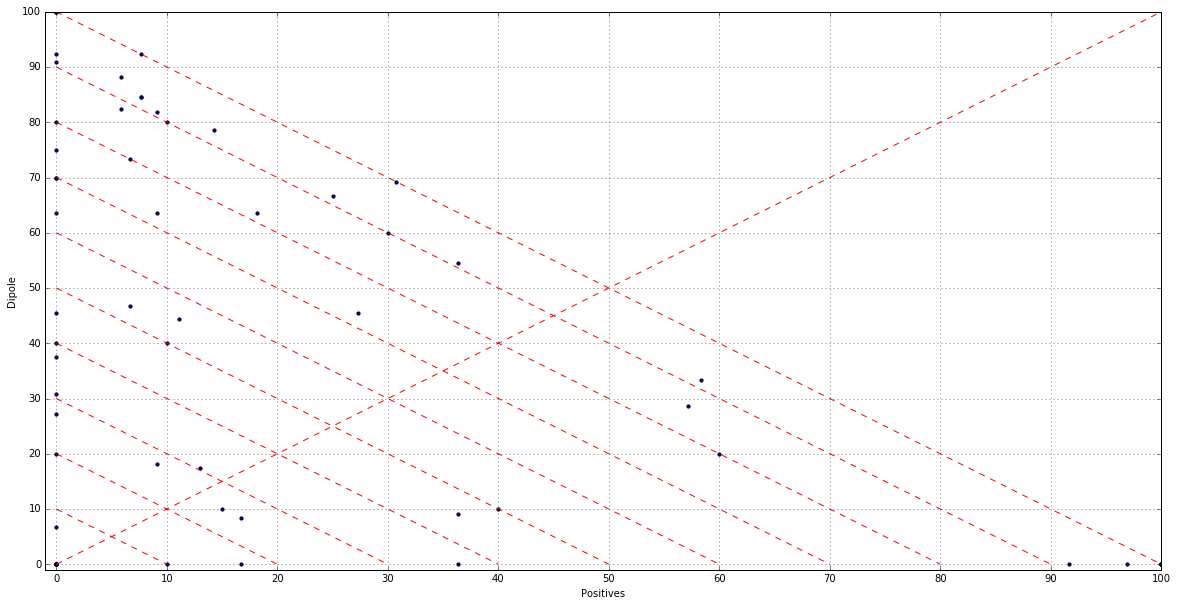

In [334]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I", percentual=True)
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II", percentual=True)
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole", percentual=True)

# Frequencies


In [335]:
pos_frequency = []
for lc in lcs:
    req = lc['classification']==6
    pos = lc[req]
    pos_frequency.append(len(pos))

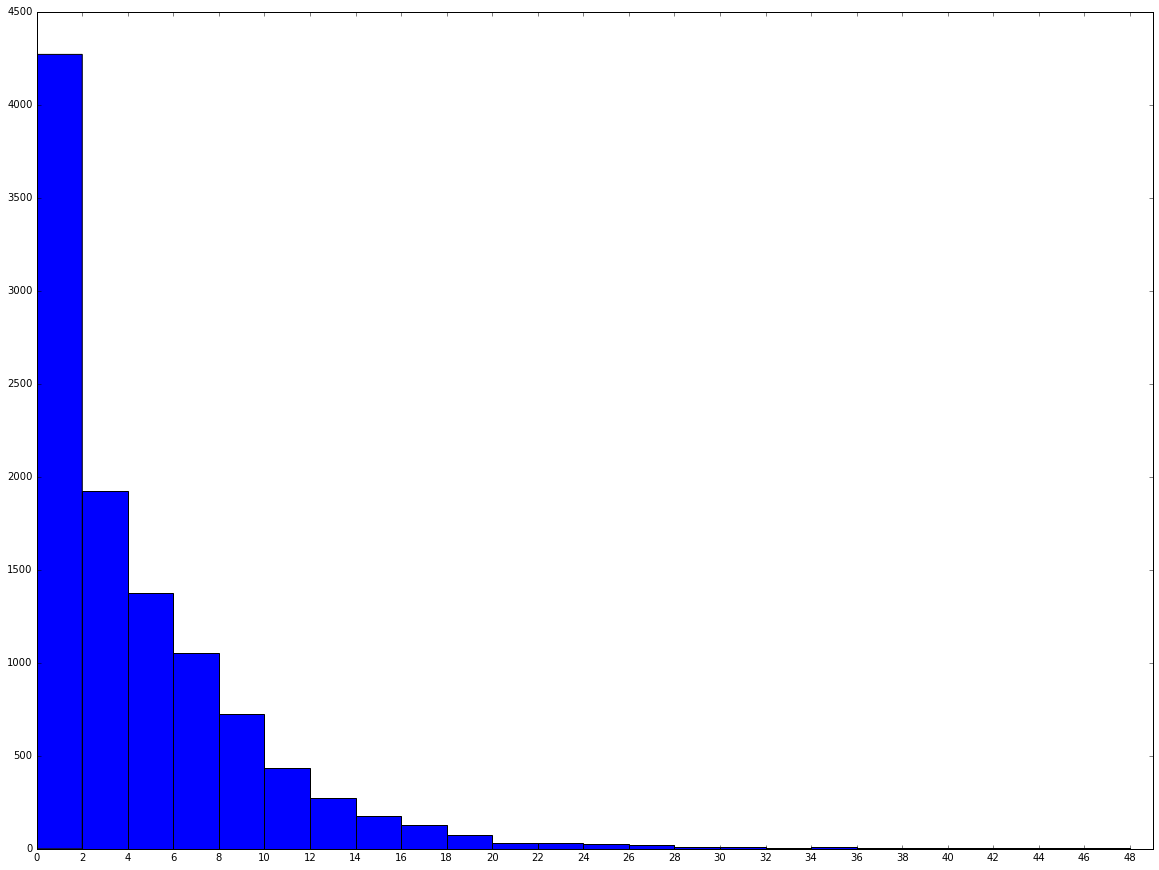

In [336]:
plt.figure(figsize=(20,15))
plt.hist(pos_frequency, range=(0,max(pos_frequency)), bins = max(pos_frequency)/2)
plt.xticks(np.arange(0,max(pos_frequency),2))
plt.xlim(xmax=max(pos_frequency)/2)
plt.show()

# Objects persisting in time

In [372]:
long_transients = []
for lc in lcs:
    mjds = lc["mjd"]
    if np.std(mjds) > 30:
        long_transients.append(lc)
        
print len(long_transients)

9282


In [379]:
props = {}

for lc in long_transients:
    for point in lc:
        if props.has_key(point['classification']) == False:
            props[point['classification']] = 1
        else:
            props[point['classification']]+=1
            
for key in classification_dict.keys():
    if props.has_key(key) == True:
        props[classification_dict[key]] = props.pop(key)

total = 0
for key in props.keys():
    total += props[key]

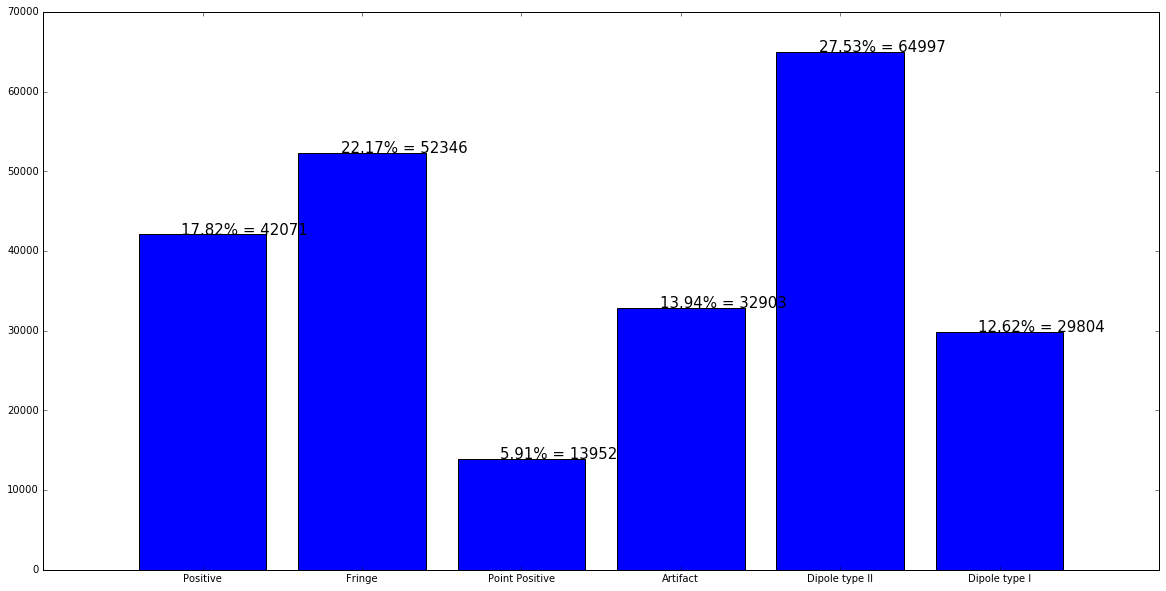

In [380]:
plot_object_distribution(props)

In [381]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()
for lc in long_transients:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=len(group)
        

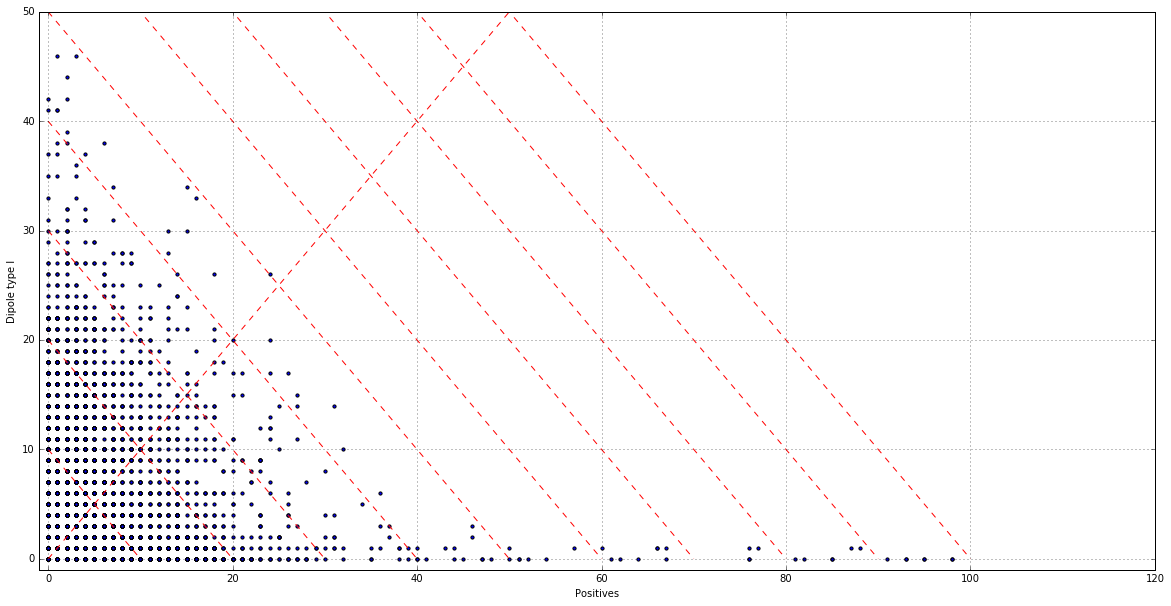

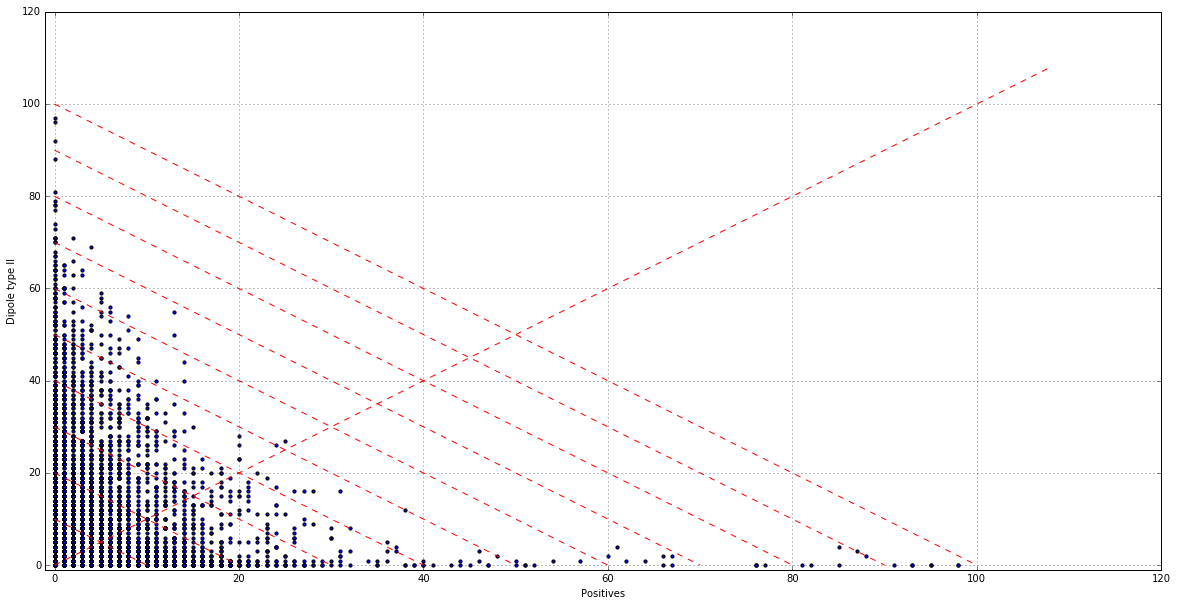

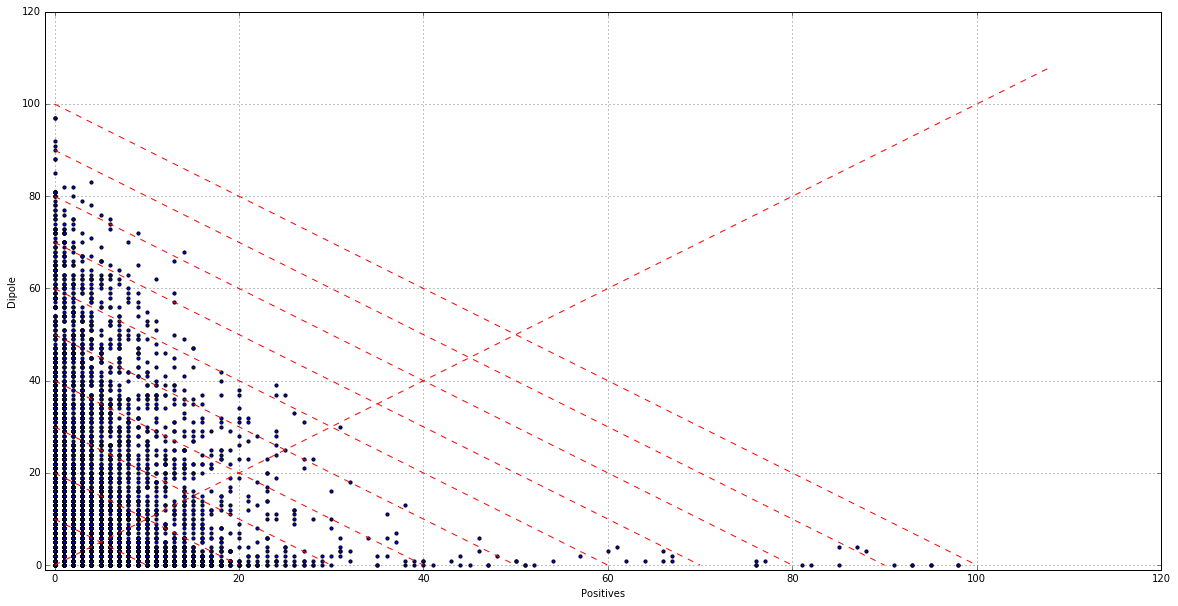

In [382]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I")
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II")
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole")

In [383]:
freq_dict = {0:[], 1:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
keys = freq_dict.keys()
for lc in long_transients:
    class_lc = lc.group_by("classification")
    indices = class_lc.groups.indices
   
    for key in keys:
        freq_dict[key].append(0)
    
    for i in range(1, len(indices)):

        i_start = indices[i-1] 
        i_end = indices[i]
        group = class_lc[i_start:i_end]
        

            
        freq_dict[group[-1]["classification"]][-1]=float(len(group))/len(lc)*100
        

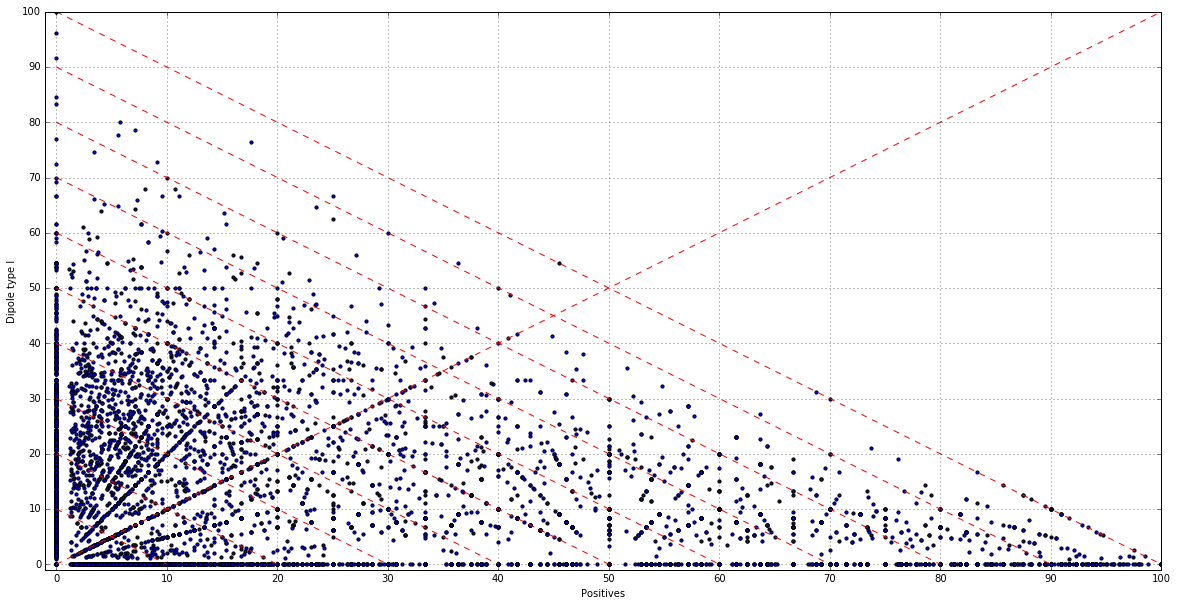

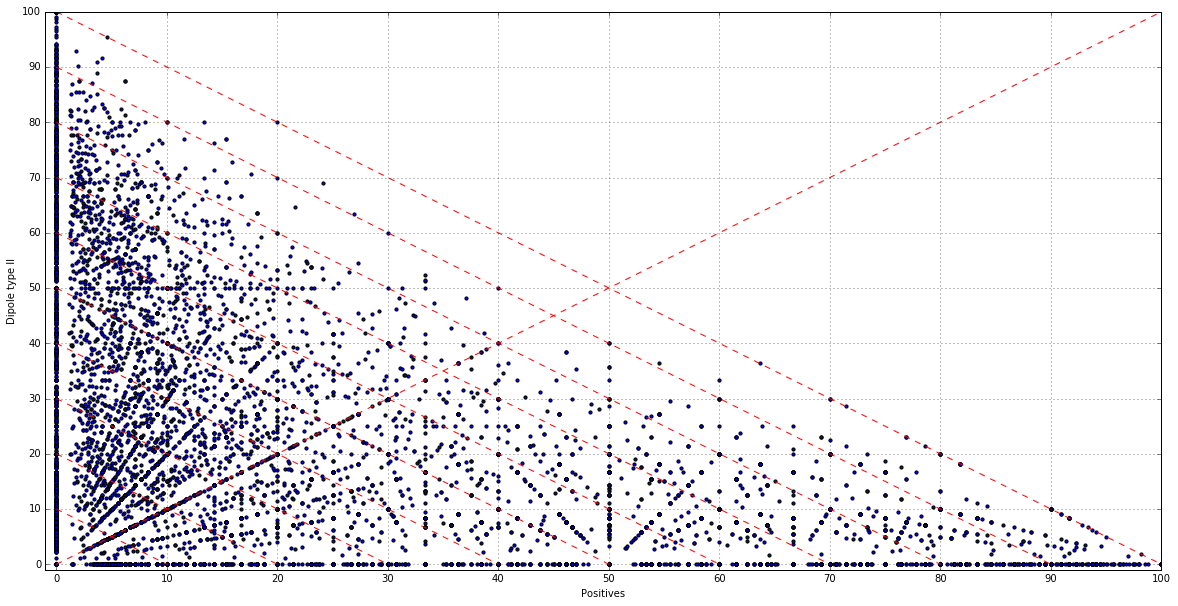

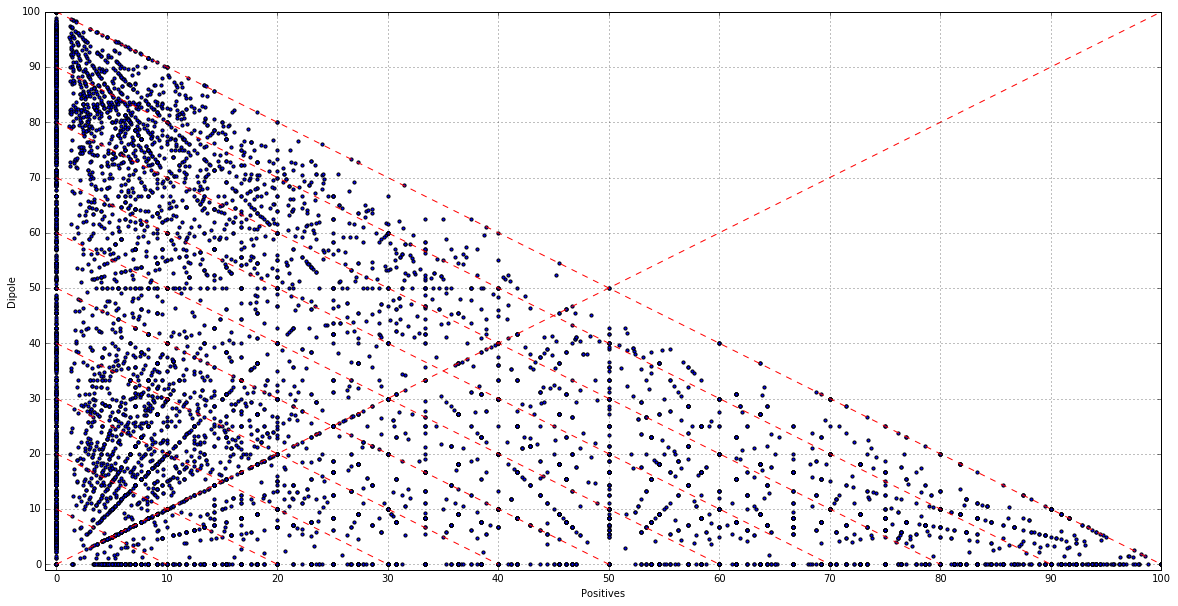

In [384]:
plot_proportion(freq_dict[6], freq_dict[0], "Positives", "Dipole type I", percentual=True)
plot_proportion(freq_dict[6], freq_dict[1], "Positives", "Dipole type II", percentual=True)
tot_dipoles = np.array(freq_dict[0])+np.array(freq_dict[1])
plot_proportion(freq_dict[6], tot_dipoles, "Positives", "Dipole", percentual=True)

In [73]:
in_directory = "nc_catalogs/6sigma/"

import lsst.afw.table as afwTable
import glob

multi_matches = None

for c_cat in visits:
    v_catalog = None
    #print "catalogs/6sigma/"+str(c_cat)+"*.fits"
    c_files = glob.glob(in_directory+str(c_cat)+"*.fits")
    
    for c_file in c_files:
        catalog = afwTable.SourceCatalog.readFits(c_file)
        l = len(catalog)
        
        pos = np.array([False]*l, bool)
    
        for i, source in enumerate(catalog):
            if source["classification_dipole"] == 6.0:
                pos[i] = True
        catalog = catalog.subset(pos)
        
        if multi_matches is None and len(catalog)>0:
            multi_matches = afwTable.MultiMatch(catalog[0].schema, {'visit':int}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
        if multi_matches is not None:
            multi_matches.add(catalog, {'visit':int(c_files[0].split("/")[-1].split("-")[0].split(".")[0])})
        
    
results = multi_matches.finish(removeAmbiguous=False)  

In [74]:
len(results)

65579

In [75]:
light_curves = []
i = 0
current = -1
while i < len(results):
    result = results[i]
    if current == -1 or current != result['object']:
        lc = [(result['visit'],result)]
        light_curves.append(lc)
        current = result['object']
    else:
        light_curves[-1].append((result['visit'],result))
    i+=1

t_light_curves = threshold_light_curves(light_curves, 10)
print len(t_light_curves)

776


In [76]:
#lc = build_lightcurve(t_light_curves[4])
lcs = []
for t_light_curve in t_light_curves:
    lcs.append(build_lightcurve(t_light_curve))

In [84]:
matches = []
for sn in elems:
    
    match = False
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    
    for i, lc in enumerate(lcs):
        #print lc[0]['ra']
        #print lc[0]['dec']
        if source_distance(lc[0], {'ra':c.ra.radian, 'dec':c.dec.radian}) < 2:
            match = True
 
            matches.append((sn[0], i))
            break
    
        #print 'no match'
print 'found ' + str(float(len(matches))/float(len(elems))) 

found 0.411764705882


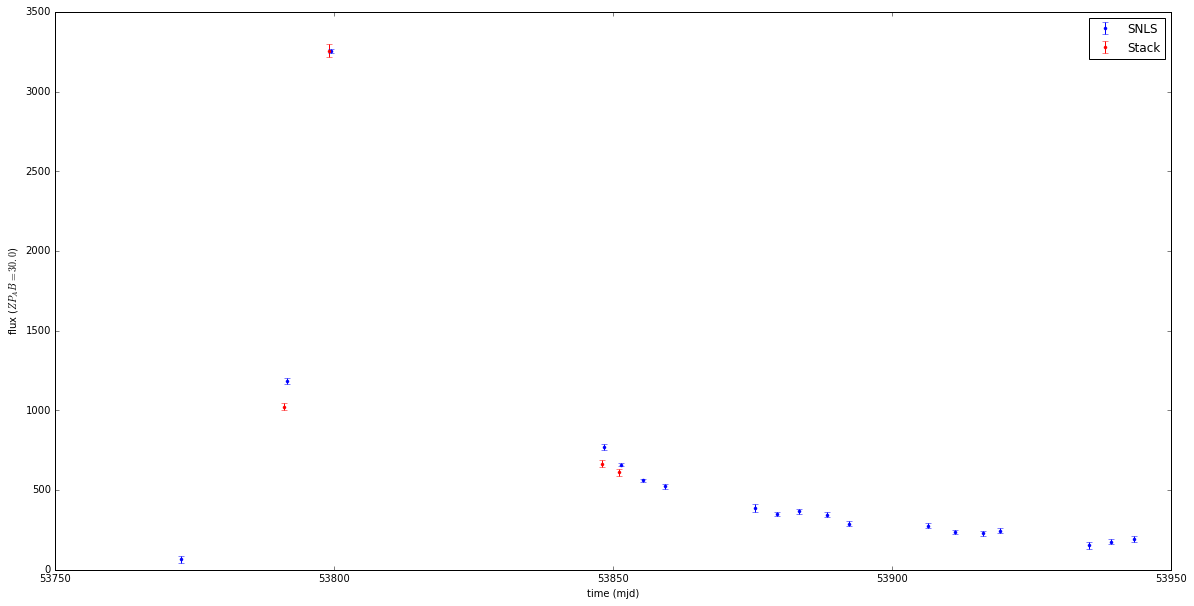

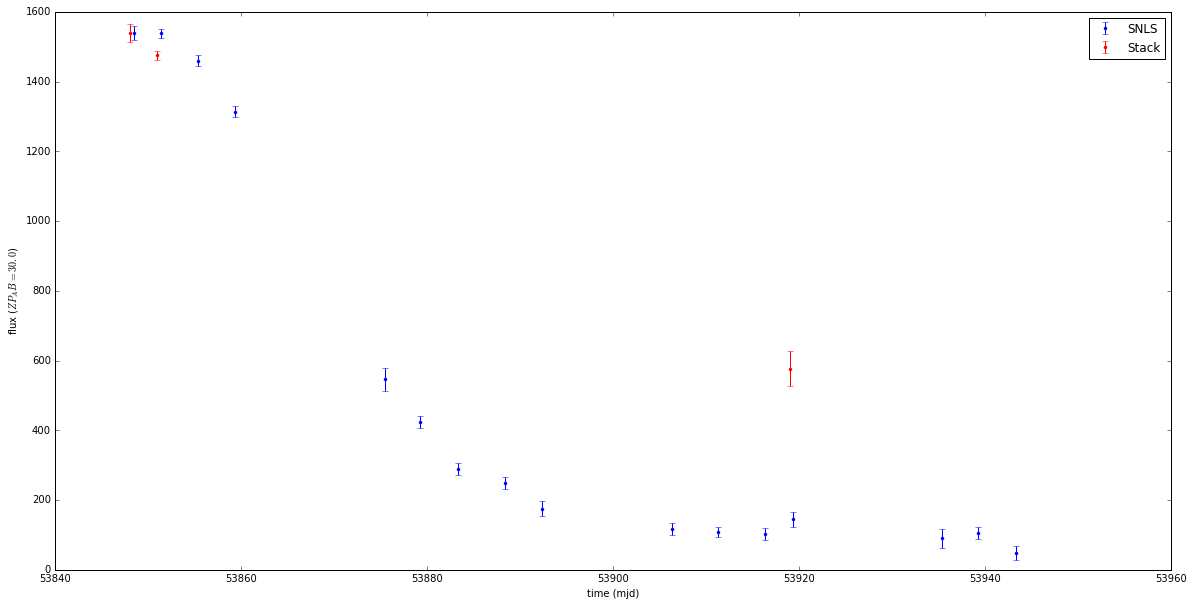

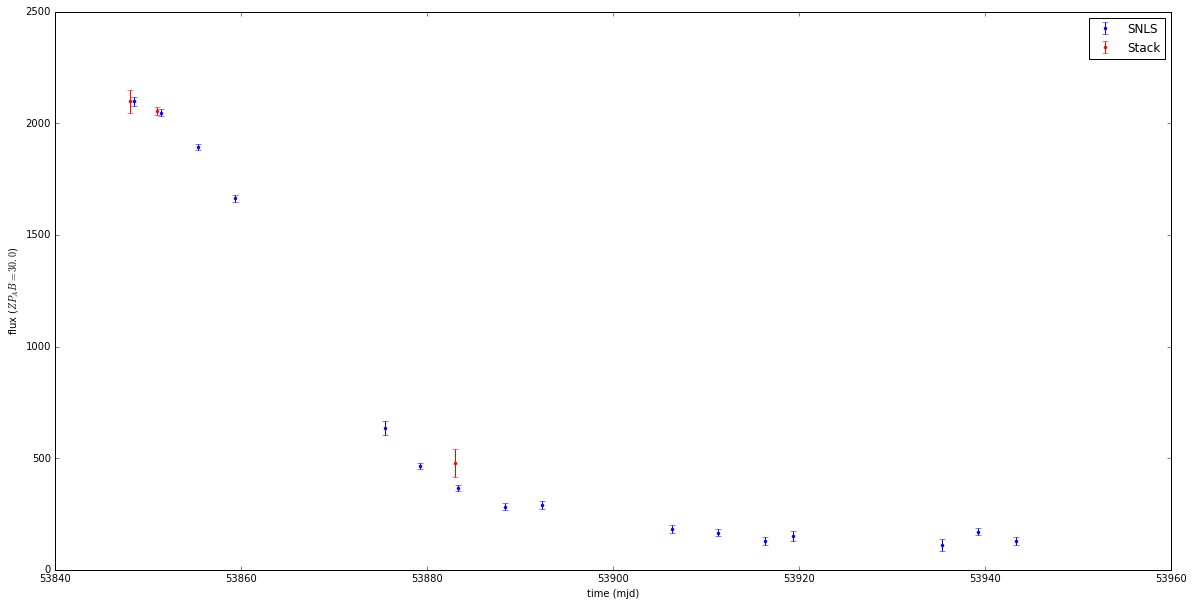

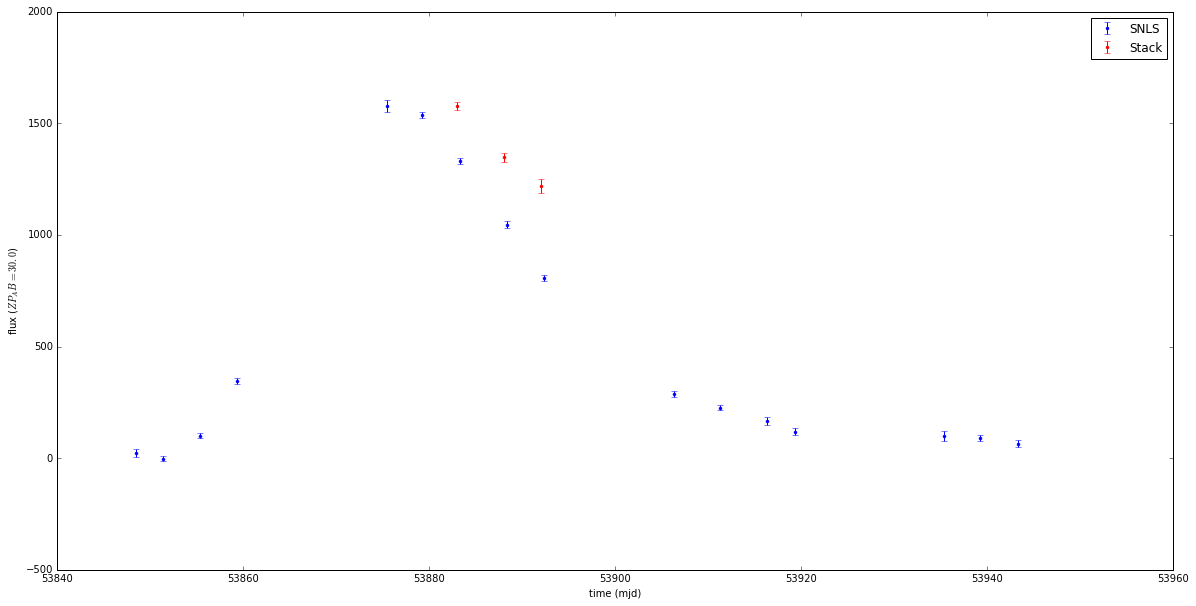

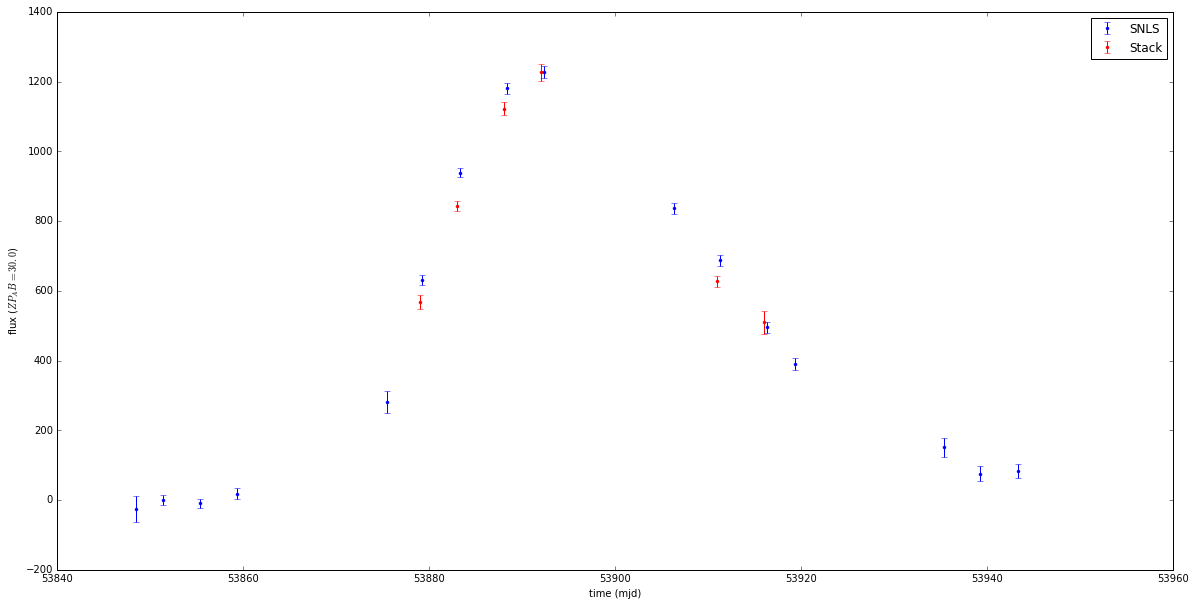

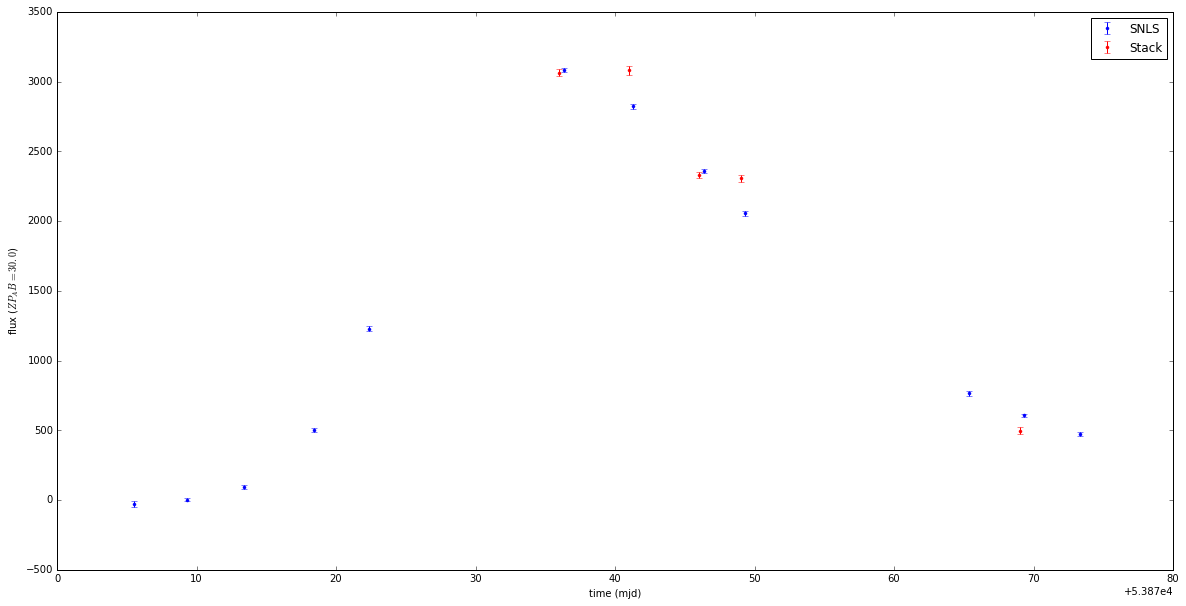

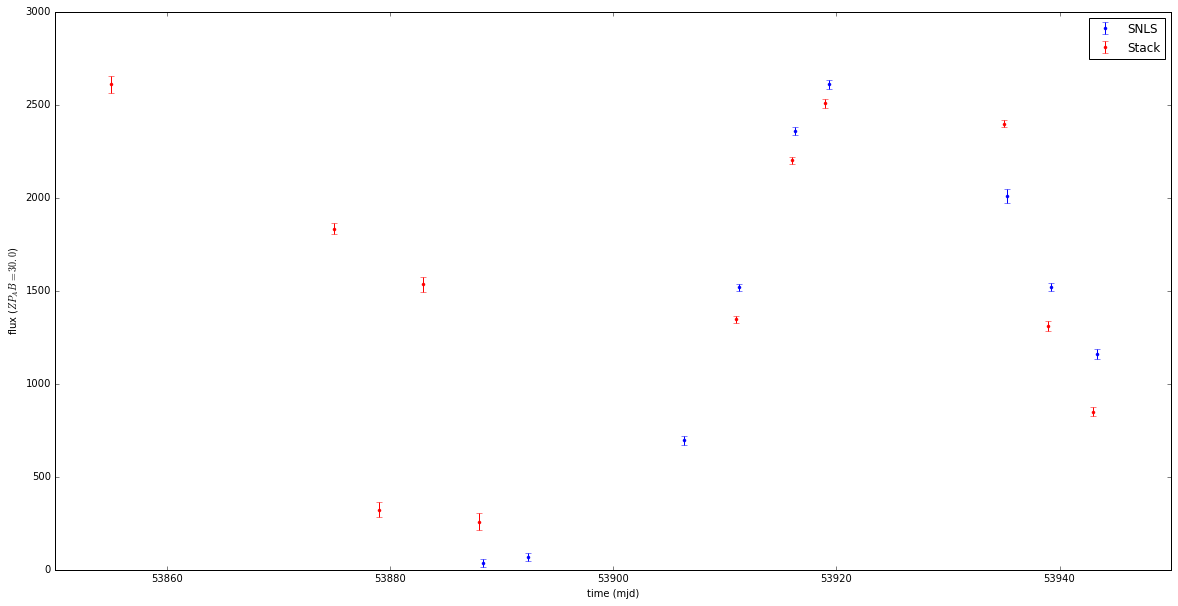

In [96]:
for match in matches:


    m = re.findall('^'+str(match[0])+'\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    plt.figure(figsize=(20,10))
    
    snls_lc = build_light_curve_from_snls_file(m, c)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')



    lc = lcs[match[-1]]  
    lc_copy = lc.copy()
    lc_copy.remove_row(0)
    


    #print lc, lc_copy
    m_mjd, m_f, m_e = mean_lc_flux(lc_copy)

    factor = max(snls_lc['flux']) / max(m_f)
    f_mf = np.multiply(m_f, factor)
    f_me = np.multiply(m_e, factor)
    
    
    plt.xlabel('time (mjd)')
    plt.ylabel('flux ($ZP_AB=30.0$)')
    plt.errorbar(m_mjd, f_mf, yerr=f_me, fmt='.', color='red', label='Stack')
    plt.legend(numpoints=1)
    plt.show()

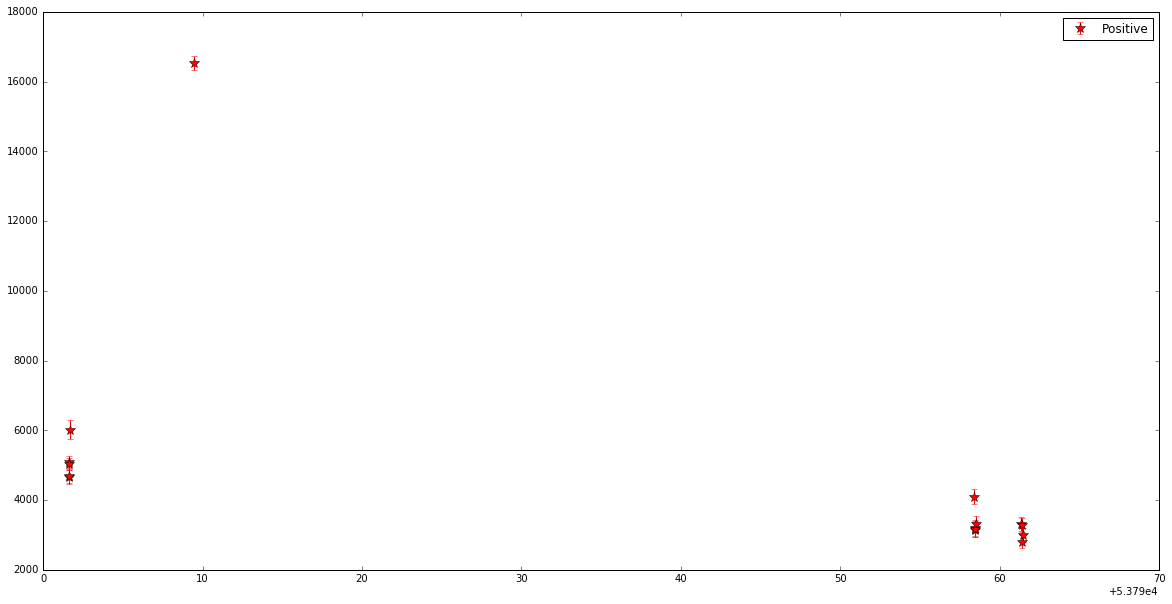

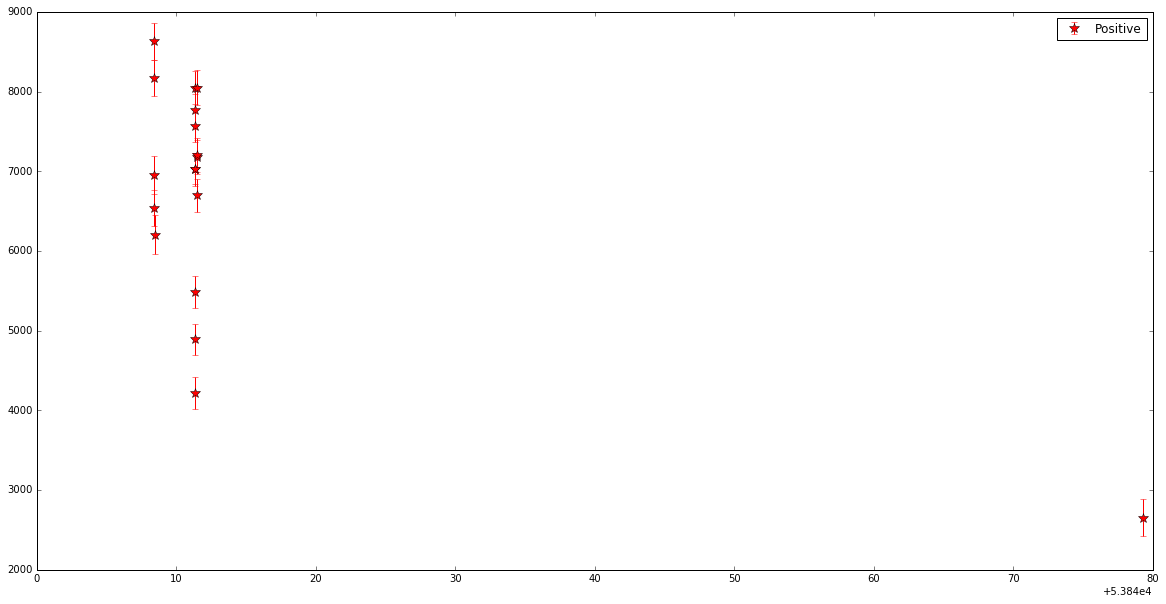

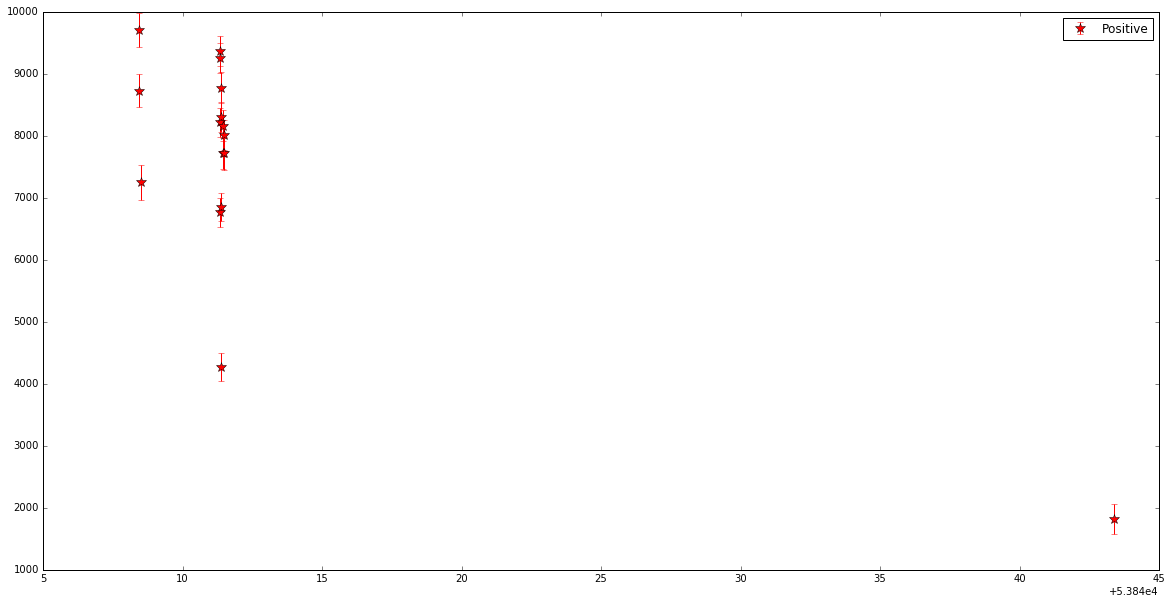

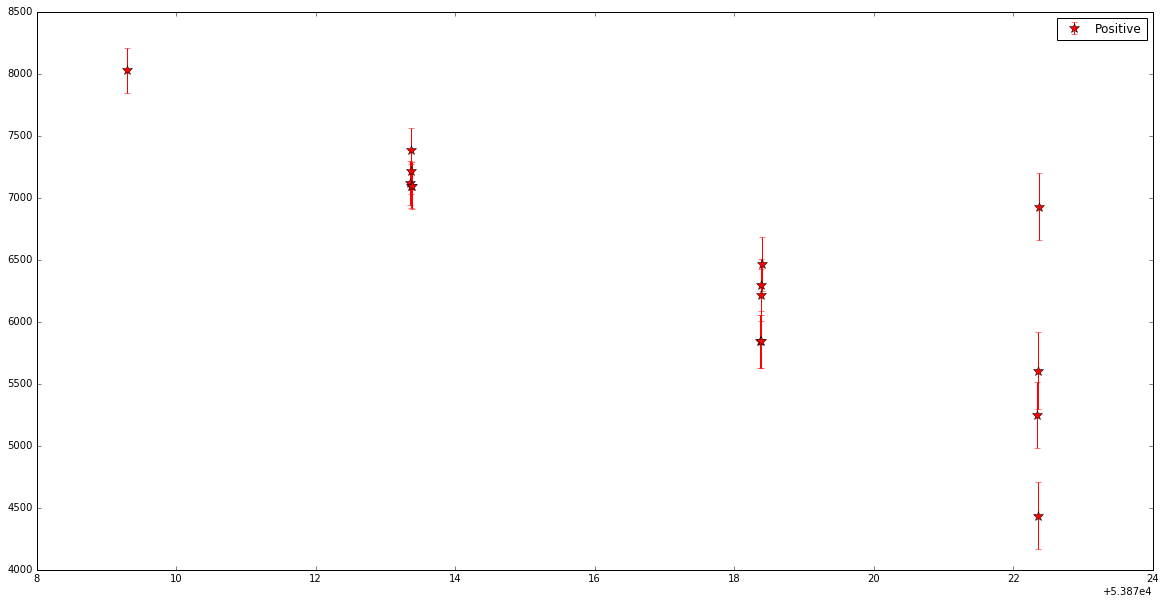

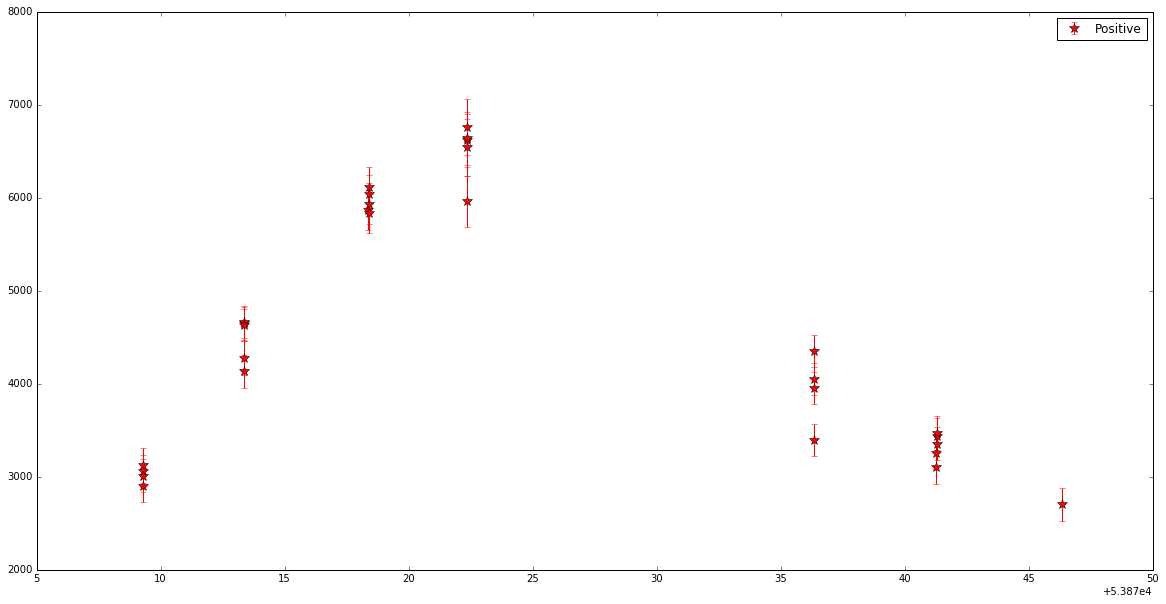

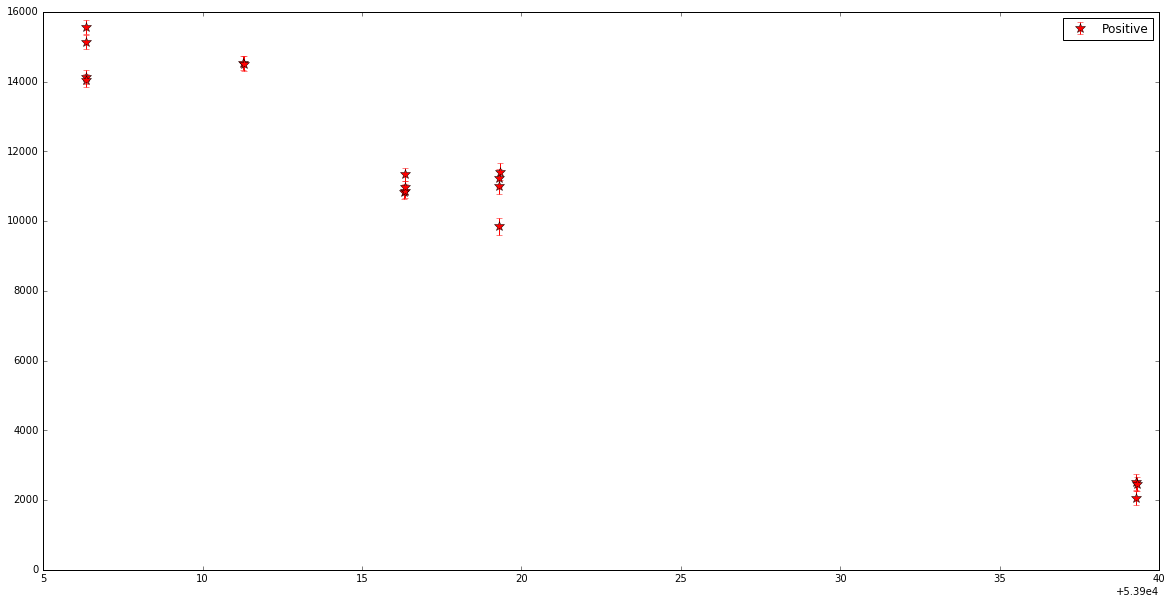

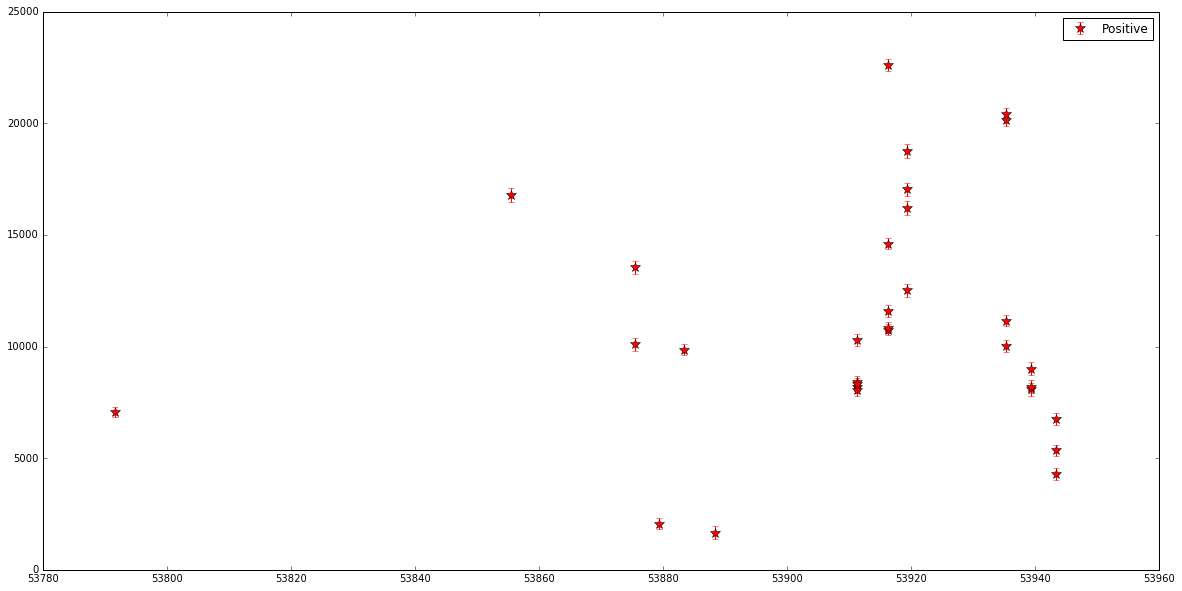

In [83]:
for match in matches:
    plot_light_curve_with_tags(match[0])

In [ ]:
classification_dict = {0:"Dipole type I", 1: "Dipole type II", 3:"Fringe", 4: "Artifact", 5:"Negative", 6:"Positive", 7:"Point Positive"}
marker_dict = {0:"x", 1: "x", 3:"^", 4: ".", 5:"v", 6:"*", 7:"."}


for lc in lcs:
    plot_light_curve_with_tags(lc)

3.0

In [80]:
lcs[0]

mjd,classification,zpsys,flux,ra,flux_error,dec,zp,bandpass
float64,float64,str2,float64,object,float64,object,float64,str5
53772.6347399,6.0,ab,4128.81542969,3.76243 rad,215.525787354,0.925661 rad,25.0,sdssr
53791.5808564,6.0,ab,8920.33789062,3.76244 rad,184.050003052,0.925662 rad,25.0,sdssr
53791.5850031,6.0,ab,9332.94140625,3.76244 rad,186.576950073,0.92566 rad,25.0,sdssr
53791.5891273,6.0,ab,6134.20849609,3.76243 rad,185.568618774,0.92566 rad,25.0,sdssr
53799.4480172,6.0,ab,6440.42822266,3.76243 rad,229.669265747,0.925661 rad,25.0,sdssr
53799.4520841,6.0,ab,6434.83349609,3.76243 rad,223.646743774,0.925661 rad,25.0,sdssr
53799.4561562,6.0,ab,6721.27783203,3.76243 rad,227.40625,0.925661 rad,25.0,sdssr
53799.4602578,6.0,ab,6388.97607422,3.76243 rad,220.103790283,0.925661 rad,25.0,sdssr
53799.4643427,6.0,ab,6396.13964844,3.76243 rad,214.540161133,0.92566 rad,25.0,sdssr
